In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from pathlib import Path

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from os import read
df = pd.read_csv('https://raw.githubusercontent.com/Amanda-411/Data-Jurnal-JPPU-Agust-2025/1c591a2e4161db429607aa437b72f524851d578b/Data%20Komunitas%20Ikan%20Sungai%20Ogan%20Kecamatan%20Sungai%20Pinang.csv')

In [3]:
df.head()

Timestamp   Waktu Sampling  \
0  23/07/2025 19:17  April s.d. Juli   
1  23/07/2025 19:18  April s.d. Juli   
2  23/07/2025 19:19  April s.d. Juli   
3  23/07/2025 19:23  April s.d. Juli   
4  23/07/2025 19:29  April s.d. Juli   

                                        Tim Peneliti  \
0  Allamanda Catharica, Siti Komariyah, Muhammad ...   
1  Allamanda Catharica, Siti Komariyah, Muhammad ...   
2  Allamanda Catharica, Siti Komariyah, Muhammad ...   
3  Allamanda Catharica, Siti Komariyah, Muhammad ...   
4  Allamanda Catharica, Siti Komariyah, Muhammad ...   

            Stasiun Sampling           Desa  Latitude (Derajat Desimal)  \
0  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
1  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
2  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
3  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
4  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   

   Longitude (Derajat Desimal) Jenis Alat Tangkap            Spesies Ikan  \
0                    104.78236            Tangkul  Osteochilus schlegelii   
1                    104.78236            Tangkul   Labiobarbus fasciatus   
2                    104.78236            Tangkul     Oxygaster anomalura   
3                    104.78236            Tangkul    Osteochilus vittatus   
4                    104.78236            Tangkul   Rasbora cephalotaenia   

   Famili Ikan  Jumlah Individu Tertangkap  
0          NaN                           5  
1          NaN                          16  
2          NaN                          21  
3          NaN                          28  
4          NaN                           5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    93 non-null     object 
 1   Waktu Sampling               93 non-null     object 
 2   Tim Peneliti                 93 non-null     object 
 3   Stasiun Sampling             93 non-null     object 
 4   Desa                         93 non-null     object 
 5   Latitude (Derajat Desimal)   93 non-null     float64
 6   Longitude (Derajat Desimal)  93 non-null     float64
 7   Jenis Alat Tangkap           93 non-null     object 
 8   Spesies Ikan                 93 non-null     object 
 9   Famili Ikan                  0 non-null      float64
 10  Jumlah Individu Tertangkap   93 non-null     int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 8.1+ KB


In [5]:
# File klasifikasi Famili-Spesies-Nama Lokal
df_famili = pd.read_csv('https://raw.githubusercontent.com/Amanda-411/Data-Jurnal-JPPU-Agust-2025/1c591a2e4161db429607aa437b72f524851d578b/data_famili_baru.csv')


# EDA (Exploratory Data Analysis)

## 1. Handle missing values & duplicate

In [6]:
# Merger dua dataframe
df_lengkap = pd.merge(df, df_famili, on='Spesies Ikan', how='left', suffixes=('', '_klasifikasi'))

In [7]:
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    93 non-null     object 
 1   Waktu Sampling               93 non-null     object 
 2   Tim Peneliti                 93 non-null     object 
 3   Stasiun Sampling             93 non-null     object 
 4   Desa                         93 non-null     object 
 5   Latitude (Derajat Desimal)   93 non-null     float64
 6   Longitude (Derajat Desimal)  93 non-null     float64
 7   Jenis Alat Tangkap           93 non-null     object 
 8   Spesies Ikan                 93 non-null     object 
 9   Famili Ikan                  0 non-null      float64
 10  Jumlah Individu Tertangkap   93 non-null     int64  
 11  Famili Ikan_klasifikasi      93 non-null     object 
 12  Nama Lokal                   93 non-null     object 
dtypes: float64(3), int64(1

In [8]:
df_lengkap.head()

Timestamp   Waktu Sampling  \
0  23/07/2025 19:17  April s.d. Juli   
1  23/07/2025 19:18  April s.d. Juli   
2  23/07/2025 19:19  April s.d. Juli   
3  23/07/2025 19:23  April s.d. Juli   
4  23/07/2025 19:29  April s.d. Juli   

                                        Tim Peneliti  \
0  Allamanda Catharica, Siti Komariyah, Muhammad ...   
1  Allamanda Catharica, Siti Komariyah, Muhammad ...   
2  Allamanda Catharica, Siti Komariyah, Muhammad ...   
3  Allamanda Catharica, Siti Komariyah, Muhammad ...   
4  Allamanda Catharica, Siti Komariyah, Muhammad ...   

            Stasiun Sampling           Desa  Latitude (Derajat Desimal)  \
0  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
1  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
2  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
3  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   
4  Stasiun 1 (Sungai Pinang)  Sungai Pinang                     -3.3515   

   Longitude (Derajat Desimal) Jenis Alat Tangkap            Spesies Ikan  \
0                    104.78236            Tangkul  Osteochilus schlegelii   
1                    104.78236            Tangkul   Labiobarbus fasciatus   
2                    104.78236            Tangkul     Oxygaster anomalura   
3                    104.78236            Tangkul    Osteochilus vittatus   
4                    104.78236            Tangkul   Rasbora cephalotaenia   

   Famili Ikan  Jumlah Individu Tertangkap Famili Ikan_klasifikasi  \
0          NaN                           5              Cyprinidae   
1          NaN                          16              Cyprinidae   
2          NaN                          21          Xenocyprididae   
3          NaN                          28              Cyprinidae   
4          NaN                           5              Cyprinidae   

                      Nama Lokal  
0                        Seberok  
1            Badas belang/Lambak  
2                   Terbul/Samis  
3             Seluang batu/Bowok  
4  Seluang belang/Seluang kureng

In [9]:
# Membuang kolom kosong/sama (identik)/ tidak perlu
df_lengkap = df_lengkap.drop(columns=["Timestamp", "Tim Peneliti", "Famili Ikan"], axis=1, errors='ignore')

In [10]:
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Waktu Sampling               93 non-null     object 
 1   Stasiun Sampling             93 non-null     object 
 2   Desa                         93 non-null     object 
 3   Latitude (Derajat Desimal)   93 non-null     float64
 4   Longitude (Derajat Desimal)  93 non-null     float64
 5   Jenis Alat Tangkap           93 non-null     object 
 6   Spesies Ikan                 93 non-null     object 
 7   Jumlah Individu Tertangkap   93 non-null     int64  
 8   Famili Ikan_klasifikasi      93 non-null     object 
 9   Nama Lokal                   93 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.4+ KB


In [11]:
# Mengubah nama kolom
df_lengkap.rename(columns={'Famili Ikan_klasifikasi': 'Famili',
    'Spesies Ikan': 'Spesies',
    'Latitude (Derajat Desimal)': 'Latitude',
    'Longitude (Derajat Desimal)': 'Longitude'}, inplace=True)
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Waktu Sampling              93 non-null     object 
 1   Stasiun Sampling            93 non-null     object 
 2   Desa                        93 non-null     object 
 3   Latitude                    93 non-null     float64
 4   Longitude                   93 non-null     float64
 5   Jenis Alat Tangkap          93 non-null     object 
 6   Spesies                     93 non-null     object 
 7   Jumlah Individu Tertangkap  93 non-null     int64  
 8   Famili                      93 non-null     object 
 9   Nama Lokal                  93 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.4+ KB


In [12]:
# Checking duplicate
df_lengkap[df_lengkap["Spesies"]=="Mystus nemurus"][["Spesies","Jumlah Individu Tertangkap"]]

Spesies  Jumlah Individu Tertangkap
23  Mystus nemurus                           1
24  Mystus nemurus                           1
80  Mystus nemurus                           2

In [13]:
# Membuang baris duplikat
df_lengkap.drop(index=[23], inplace=True)

In [14]:
df_lengkap[df_lengkap["Spesies"]=="Mystus nemurus"]

Waktu Sampling                      Stasiun Sampling           Desa  \
24  April s.d. Juli             Stasiun 1 (Sungai Pinang)  Sungai Pinang   
80  April s.d. Juli  Stasiun 3 (Penyadingan bagian Hilir)   Penyandingan   

    Latitude  Longitude Jenis Alat Tangkap         Spesies  \
24   -3.3515  104.78236             Jaring  Mystus nemurus   
80   -3.3315  104.77828            Tangkul  Mystus nemurus   

    Jumlah Individu Tertangkap    Famili                Nama Lokal  
24                           1  Bagridae  Patin kepala lebar/Baung  
80                           2  Bagridae  Patin kepala lebar/Baung

In [15]:
# Memastikan semua nama spesies konsisten (huruf kecil dan tanpa spasi ekstra di awal/akhir)
df_lengkap['Spesies'] = df_lengkap['Spesies'].str.lower().str.strip()
print(df_lengkap['Spesies'].value_counts())

Spesies
oxygaster anomalura             5
labiobarbus fasciatus           4
rasbora tornieri                4
clupeoides borneensis           4
kryptopterus geminus            4
rasbora argyrotaenia            4
rasbora cephalotaenia           3
osteochilus vittatus            3
kryptopterus limpok             3
labiobarbus sabanus             3
ambassis kopsii                 3
osteochilus schlegelii          3
pangasius micronemus            2
anematichthys armatus           2
litopenaeus vannamei            2
cyclocheilichthys enoplos       2
mystus gulio                    2
hampala macrolepidota           2
anabas testudineus              2
barbonymus schwanenfeldii       2
kryptopterus micronema          2
mystus nemurus                  2
cyclocheilichthys heteronema    2
pseudeutropius moolenburghae    2
pangasius polyuranodon          2
rasbora aurotaenia              2
macrobrachium rosenbergii       2
rasbora wilpita                 1
mystus nigriceps                1
puntiu

In [16]:
# Kapitalisasi hanya huruf pertama dari seluruh string (genus)
df_lengkap['Spesies'] = df_lengkap['Spesies'].str.capitalize()
print(df_lengkap['Spesies'].value_counts())

Spesies
Oxygaster anomalura             5
Labiobarbus fasciatus           4
Rasbora tornieri                4
Clupeoides borneensis           4
Kryptopterus geminus            4
Rasbora argyrotaenia            4
Rasbora cephalotaenia           3
Osteochilus vittatus            3
Kryptopterus limpok             3
Labiobarbus sabanus             3
Ambassis kopsii                 3
Osteochilus schlegelii          3
Pangasius micronemus            2
Anematichthys armatus           2
Litopenaeus vannamei            2
Cyclocheilichthys enoplos       2
Mystus gulio                    2
Hampala macrolepidota           2
Anabas testudineus              2
Barbonymus schwanenfeldii       2
Kryptopterus micronema          2
Mystus nemurus                  2
Cyclocheilichthys heteronema    2
Pseudeutropius moolenburghae    2
Pangasius polyuranodon          2
Rasbora aurotaenia              2
Macrobrachium rosenbergii       2
Rasbora wilpita                 1
Mystus nigriceps                1
Puntiu

## 2. Descriptive Statistics

In [17]:
df_lengkap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 92
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Waktu Sampling              92 non-null     object 
 1   Stasiun Sampling            92 non-null     object 
 2   Desa                        92 non-null     object 
 3   Latitude                    92 non-null     float64
 4   Longitude                   92 non-null     float64
 5   Jenis Alat Tangkap          92 non-null     object 
 6   Spesies                     92 non-null     object 
 7   Jumlah Individu Tertangkap  92 non-null     int64  
 8   Famili                      92 non-null     object 
 9   Nama Lokal                  92 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.9+ KB


### Data Quality Checks

In [18]:
# Checking for missing values
df_lengkap.isna().sum()

Waktu Sampling                0
Stasiun Sampling              0
Desa                          0
Latitude                      0
Longitude                     0
Jenis Alat Tangkap            0
Spesies                       0
Jumlah Individu Tertangkap    0
Famili                        0
Nama Lokal                    0
dtype: int64

In [19]:
# Checking duplicate record
df_lengkap.duplicated().sum()

np.int64(0)

In [20]:
cats = ['Stasiun Sampling', 'Desa', 'Jenis Alat Tangkap', 'Spesies', 'Famili', 'Nama Lokal']
nums = ['Jumlah Individu Tertangkap', 'Latitude', 'Longitude']
df_lengkap[cats].describe()

Stasiun Sampling           Desa Jenis Alat Tangkap  \
count                          92             92                 92   
unique                          3              2                  5   
top     Stasiun 1 (Sungai Pinang)  Sungai Pinang              Serok   
freq                           53             53                 27   

                    Spesies      Famili    Nama Lokal  
count                    92          92            92  
unique                   46          20            46  
top     Oxygaster anomalura  Cyprinidae  Terbul/Samis  
freq                      5          42             5

In [21]:
df_lengkap[nums].describe()

Jumlah Individu Tertangkap   Latitude   Longitude
count                   92.000000  92.000000   92.000000
mean                    17.456522  -3.344278  104.780624
std                     57.083208   0.008674    0.002035
min                      1.000000  -3.351500  104.778250
25%                      1.000000  -3.351500  104.778280
50%                      2.000000  -3.351500  104.782360
75%                      8.000000  -3.337280  104.782360
max                    398.000000  -3.331500  104.782360

In [22]:
df_lengkap.groupby('Spesies').agg({'Spesies':['count']}).head()

Spesies
                            count
Spesies                          
Ambassis kopsii                 3
Anabas testudineus              2
Anematichthys armatus           2
Barbonymus gonionotus           1
Barbonymus schwanenfeldii       2

In [23]:
df_lengkap.groupby('Jenis Alat Tangkap').agg({'Spesies':['count']}).head()

Spesies
                     count
Jenis Alat Tangkap        
Bubu                     4
Jala                    15
Jaring                  20
Serok                   27
Tangkul                 26

In [24]:
df_lengkap.groupby('Stasiun Sampling').agg({'Spesies':['count']}).head()

Spesies
                                       count
Stasiun Sampling                            
Stasiun 1 (Sungai Pinang)                 53
Stasiun 2 (Penyandingan)                  20
Stasiun 3 (Penyadingan bagian Hilir)      19

In [25]:
df_lengkap.groupby('Stasiun Sampling').agg({'Spesies':['nunique']}).head()

Spesies
                                     nunique
Stasiun Sampling                            
Stasiun 1 (Sungai Pinang)                 41
Stasiun 2 (Penyandingan)                  20
Stasiun 3 (Penyadingan bagian Hilir)      15

In [26]:
df_lengkap.groupby('Stasiun Sampling').agg({'Jenis Alat Tangkap':['nunique']}).head()

Jenis Alat Tangkap
                                                nunique
Stasiun Sampling                                       
Stasiun 1 (Sungai Pinang)                             4
Stasiun 2 (Penyandingan)                              1
Stasiun 3 (Penyadingan bagian Hilir)                  2

### Calculate Diversity Indices

In [27]:
# Menghitung indeks
def calculate_diversity_indices(group_df):
    total_individuals = group_df['Jumlah Individu Tertangkap'].sum()
    species_counts = group_df.groupby('Spesies')['Jumlah Individu Tertangkap'].sum()

    # Indeks Keanekaragaman (Shannon-Wiener - H')
    # H' = -sum(Pi * ln(Pi))
    Pi = species_counts / total_individuals
    Shannon_Wiener_H = -np.sum(Pi * np.log(Pi.replace(0, np.nan).dropna())) # handle log(0)

    # Indeks Kemerataan (Evenness - Pielou's J)
    # J = H' / ln(S)
    S = len(species_counts) # Jumlah spesies unik
    if S > 1: # Avoid log(1) which is 0
        Evenness_J = Shannon_Wiener_H / np.log(S)
    else:
        Evenness_J = np.nan # Or 0, depending on definition for S=1

    # Indeks Dominansi (Simpson - D)
    # D = sum((ni/N)^2)
    # Atau 1 - D_simpson (untuk interpretasi keanekaragaman)
    Simpson_D = np.sum((species_counts / total_individuals)**2)

    return pd.Series({
        'Shannon_Wiener_H':  Shannon_Wiener_H,
        'Evenness_J': Evenness_J,
        'Simpson_Dominance_D': Simpson_D
    })

In [28]:
# Perhitungan per Stasiun Sampling
diversity_results_per_station = df_lengkap.groupby('Stasiun Sampling').apply(calculate_diversity_indices)
print("\nIndeks Keanekaragaman per Stasiun Sampling:")
display(diversity_results_per_station)

# per Desa:
diversity_results_per_desa = df_lengkap.groupby('Desa').apply(calculate_diversity_indices)
print("\nIndeks Keanekaragaman per Desa:")
display(diversity_results_per_desa)

# Keseluruhan:
diversity_overall = calculate_diversity_indices(df_lengkap)
print("\nIndeks Keanekaragaman Keseluruhan:")
display(diversity_overall)


Indeks Keanekaragaman per Stasiun Sampling:


/tmp/ipython-input-2301270543.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_results_per_station = df_lengkap.groupby('Stasiun Sampling').apply(calculate_diversity_indices)


Shannon_Wiener_H  Evenness_J  \
Stasiun Sampling                                                     
Stasiun 1 (Sungai Pinang)                     2.870806    0.773058   
Stasiun 2 (Penyandingan)                      1.362296    0.454746   
Stasiun 3 (Penyadingan bagian Hilir)          0.941292    0.347590   

                                      Simpson_Dominance_D  
Stasiun Sampling                                           
Stasiun 1 (Sungai Pinang)                        0.088228  
Stasiun 2 (Penyandingan)                         0.461983  
Stasiun 3 (Penyadingan bagian Hilir)             0.557317


Indeks Keanekaragaman per Desa:


/tmp/ipython-input-2301270543.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity_results_per_desa = df_lengkap.groupby('Desa').apply(calculate_diversity_indices)


Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D
Desa                                                            
Penyandingan           1.263952    0.392669             0.499648
Sungai Pinang          2.870806    0.773058             0.088228


Indeks Keanekaragaman Keseluruhan:


Shannon_Wiener_H       1.841498
Evenness_J             0.480980
Simpson_Dominance_D    0.347535
dtype: float64

In [29]:
print(diversity_results_per_station.describe())

       Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D
count          3.000000    3.000000             3.000000
mean           1.724798    0.525131             0.369176
std            1.014550    0.221295             0.247933
min            0.941292    0.347590             0.088228
25%            1.151794    0.401168             0.275106
50%            1.362296    0.454746             0.461983
75%            2.116551    0.613902             0.509650
max            2.870806    0.773058             0.557317


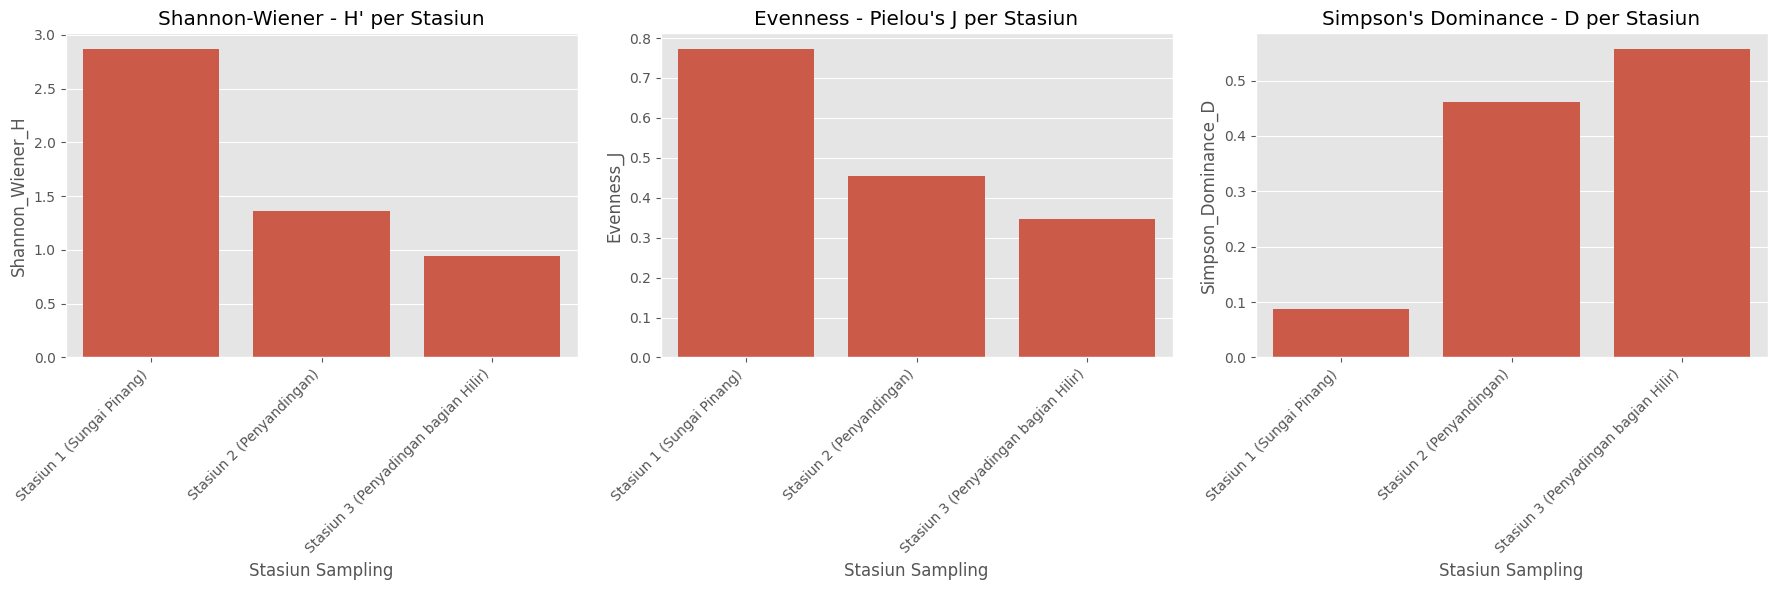

In [30]:
# Visualisasikan Distribusi
plt.figure(figsize=(18, 6))

# Plot untuk Shannon-Wiener
plt.subplot(1, 3, 1)
sns.barplot(x=diversity_results_per_station.index, y='Shannon_Wiener_H', data=diversity_results_per_station)
plt.title("Shannon-Wiener - H' per Stasiun")
plt.xlabel('Stasiun Sampling')
plt.ylabel('Shannon_Wiener_H')
plt.xticks(rotation=45, ha='right') # Memutar label x agar tidak tumpang tindih

# Plot untuk Evenness
plt.subplot(1, 3, 2)
sns.barplot(x=diversity_results_per_station.index, y='Evenness_J', data=diversity_results_per_station)
plt.title("Evenness - Pielou's J per Stasiun")
plt.xlabel('Stasiun Sampling')
plt.ylabel('Evenness_J')
plt.xticks(rotation=45, ha='right')

# Plot untuk Simpson Dominance
plt.subplot(1, 3, 3)
sns.barplot(x=diversity_results_per_station.index, y='Simpson_Dominance_D', data=diversity_results_per_station)
plt.title("Simpson's Dominance - D per Stasiun")
plt.xlabel('Stasiun Sampling')
plt.ylabel('Simpson_Dominance_D')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

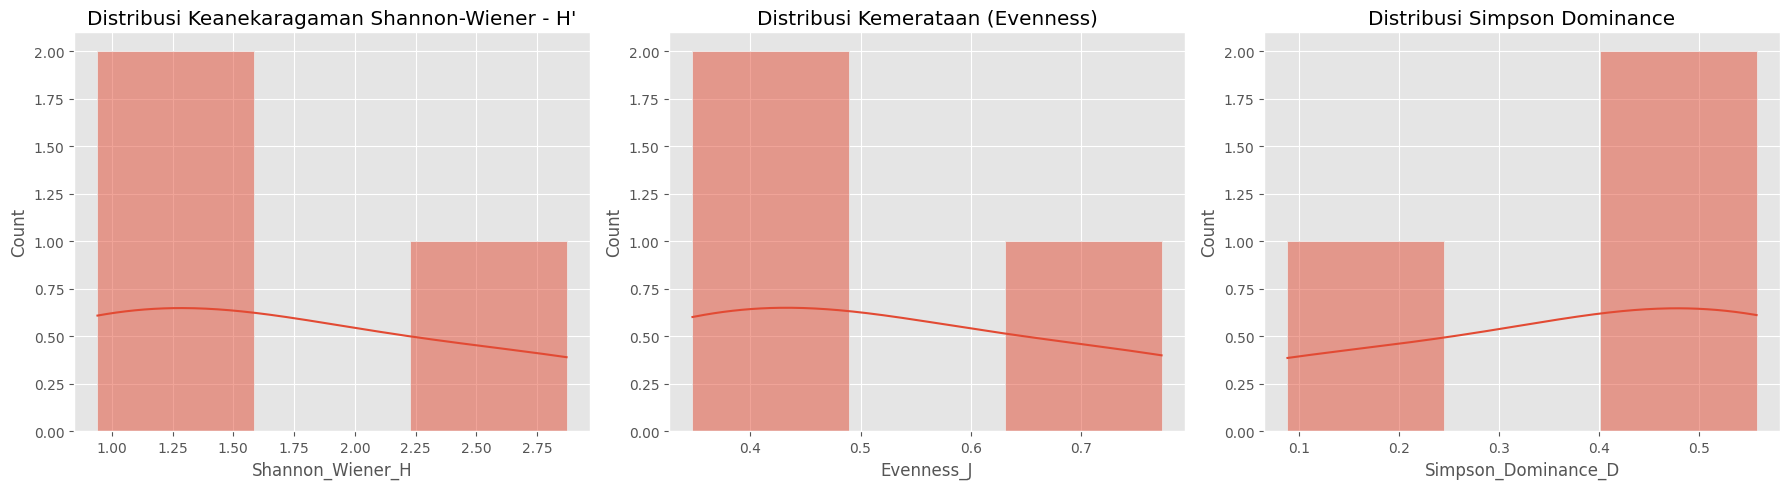

In [31]:
# Visualisasikan Distribusi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(diversity_results_per_station['Shannon_Wiener_H'], kde=True, ax=axes[0])
axes[0].set_title("Distribusi Keanekaragaman Shannon-Wiener - H'")

sns.histplot(diversity_results_per_station['Evenness_J'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Kemerataan (Evenness)')

sns.histplot(diversity_results_per_station['Simpson_Dominance_D'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Simpson Dominance')

plt.tight_layout()
plt.show()

In [32]:
# Stasiun dengan keanekaragaman tertinggi (Shannon-Wiener)
print("Stasiun dengan keanekaragaman tertinggi (Shannon-Wiener):")
print(diversity_results_per_station.sort_values(by='Shannon_Wiener_H', ascending=False).head())
print("="*100)

# Stasiun dengan dominansi tertinggi (Simpson Dominance)
# Nilai Simpson Dominance yang LEBIH TINGGI berarti keanekaragaman LEBIH RENDAH (dominansi tinggi)
print("\nStasiun dengan dominansi tertinggi (Simpson Dominance):")
print(diversity_results_per_station.sort_values(by='Simpson_Dominance_D', ascending=False).head())
print("="*100)

# Stasiun dengan kemerataan tertinggi (Evenness)
# Nilai Evenness yang LEBIH TINGGI berarti kemerataan LEBIH BAIK
print("\nStasiun dengan kemerataan tertinggi (Evenness):")
print(diversity_results_per_station.sort_values(by='Evenness_J', ascending=False).head())
print("="*100)

# Stasiun dengan kemerataan terendah (Evenness)
# Nilai Evenness yang LEBIH RENDAH berarti kemerataan LEBIH BURUK
print("\nStasiun dengan kemerataan terendah (Evenness):")
print(diversity_results_per_station.sort_values(by='Evenness_J', ascending=True).head())

Stasiun dengan keanekaragaman tertinggi (Shannon-Wiener):
                                      Shannon_Wiener_H  Evenness_J  \
Stasiun Sampling                                                     
Stasiun 1 (Sungai Pinang)                     2.870806    0.773058   
Stasiun 2 (Penyandingan)                      1.362296    0.454746   
Stasiun 3 (Penyadingan bagian Hilir)          0.941292    0.347590   

                                      Simpson_Dominance_D  
Stasiun Sampling                                           
Stasiun 1 (Sungai Pinang)                        0.088228  
Stasiun 2 (Penyandingan)                         0.461983  
Stasiun 3 (Penyadingan bagian Hilir)             0.557317  

Stasiun dengan dominansi tertinggi (Simpson Dominance):
                                      Shannon_Wiener_H  Evenness_J  \
Stasiun Sampling                                                     
Stasiun 3 (Penyadingan bagian Hilir)          0.941292    0.347590   
Stasiun 2 (Penyandingan)

## 3. Univariate & Bivariate Analysis

### Categorical Data

In [33]:
categoricals = ['Stasiun Sampling', 'Desa', 'Jenis Alat Tangkap', 'Spesies', 'Famili', 'Nama Lokal']

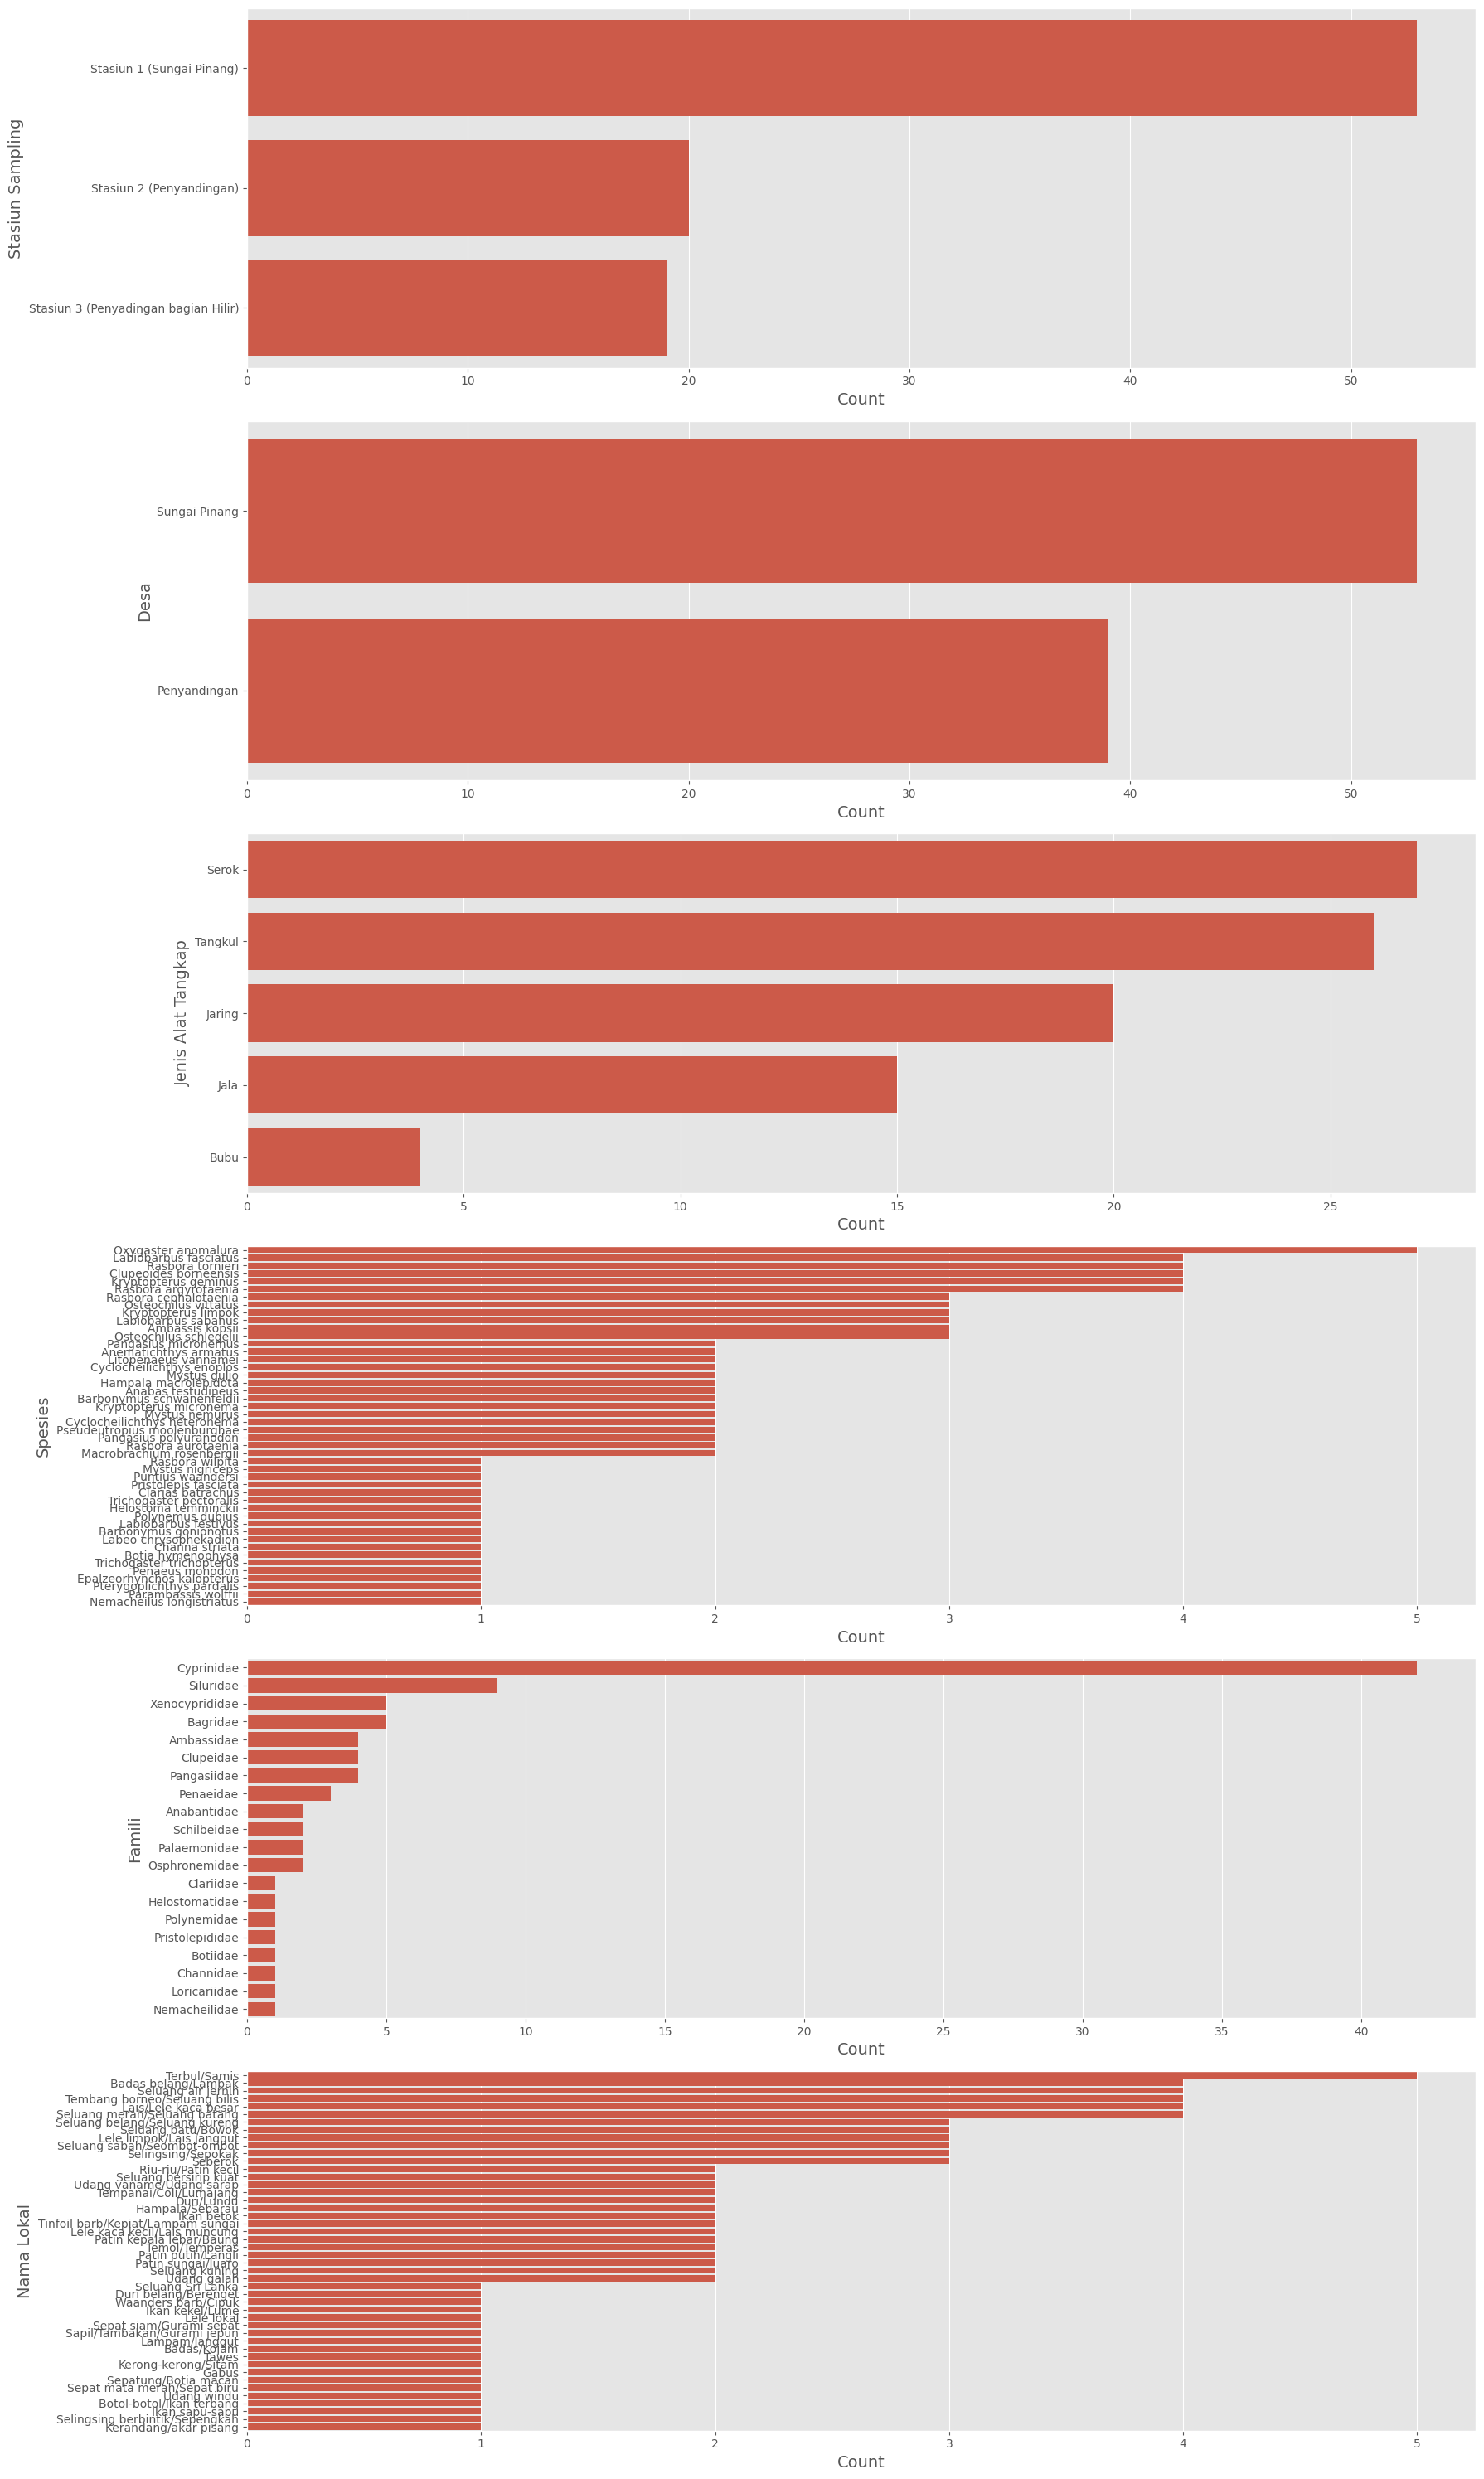

In [34]:
plt.figure(figsize=(18, len(cats) * 5)) # Adjust figure size based on number of categories
for idx, col in enumerate(cats):
    plt.subplot(len(cats), 1, idx + 1)
    sns.countplot(data = df_lengkap, y = col, order = df_lengkap[col].value_counts().index)
    plt.ylabel(col, fontsize = 14)
    plt.xlabel("Count", fontsize = 14)
    plt.tight_layout()

plt.show()

### Numerical Data

#### Jumlah Individu Tertangkap

In [35]:
Q1_Jumlah_Individu_Tertangkap = np.quantile(df_lengkap['Jumlah Individu Tertangkap'], .25)
Q3_Jumlah_Individu_Tertangkap = np.quantile(df_lengkap['Jumlah Individu Tertangkap'], .75)
IQR_Jumlah_Individu_Tertangkap = Q3_Jumlah_Individu_Tertangkap - Q1_Jumlah_Individu_Tertangkap
min_IQR_age = Q1_Jumlah_Individu_Tertangkap - 1.5 * IQR_Jumlah_Individu_Tertangkap
max_IQR_age = Q3_Jumlah_Individu_Tertangkap + 1.5 * IQR_Jumlah_Individu_Tertangkap
nilai_min_Jumlah_Individu_Tertangkap = np.min(df_lengkap['Jumlah Individu Tertangkap'])
nilai_max_Jumlah_Individu_Tertangkap = np.max(df_lengkap['Jumlah Individu Tertangkap'])

print('')
print('A. Mencari outlier dari kolom Jumlah Individu Tertangkap')
print('1. nilai Q1 dari Jumlah Individu Tertangkap =', Q1_Jumlah_Individu_Tertangkap)
print('2. nilai Q3 dari Jumlah Individu Tertangkap =', Q3_Jumlah_Individu_Tertangkap)
print('3. nilai IQR dari Jumlah Individu Tertangkap =', IQR_Jumlah_Individu_Tertangkap)
print('4. nilai min IQR dari Jumlah Individu Tertangkap =', min_IQR_age)
print('5. nilai max IQR dari Jumlah Individu Tertangkap =', max_IQR_age)
print('6. nilai min dari Jumlah Individu Tertangkap =', nilai_min_Jumlah_Individu_Tertangkap)
print('7. nilai max dari Jumlah Individu Tertangkap =', nilai_max_Jumlah_Individu_Tertangkap)

if (nilai_min_Jumlah_Individu_Tertangkap < min_IQR_age):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')

if (nilai_max_Jumlah_Individu_Tertangkap > max_IQR_age):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom Jumlah Individu Tertangkap
1. nilai Q1 dari Jumlah Individu Tertangkap = 1.0
2. nilai Q3 dari Jumlah Individu Tertangkap = 8.0
3. nilai IQR dari Jumlah Individu Tertangkap = 7.0
4. nilai min IQR dari Jumlah Individu Tertangkap = -9.5
5. nilai max IQR dari Jumlah Individu Tertangkap = 18.5
6. nilai min dari Jumlah Individu Tertangkap = 1
7. nilai max dari Jumlah Individu Tertangkap = 398
Tidak ditemukan low outlier!
Ditemukan high outlier!


<Axes: ylabel='Jumlah Individu Tertangkap'>

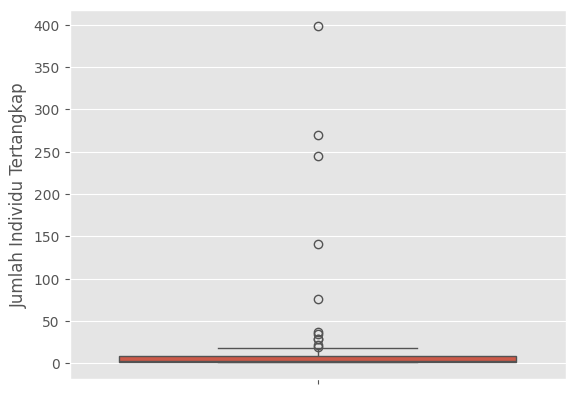

In [36]:
sns.boxplot(df_lengkap['Jumlah Individu Tertangkap'])

/tmp/ipython-input-3218095059.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lengkap[nums[i]], color = 'gray')
/tmp/ipython-input-3218095059.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_lengkap[nums[i]], color = 'gray')
/tmp/ipython-input-3218095059.py:4: UserWarning: 

`distpl

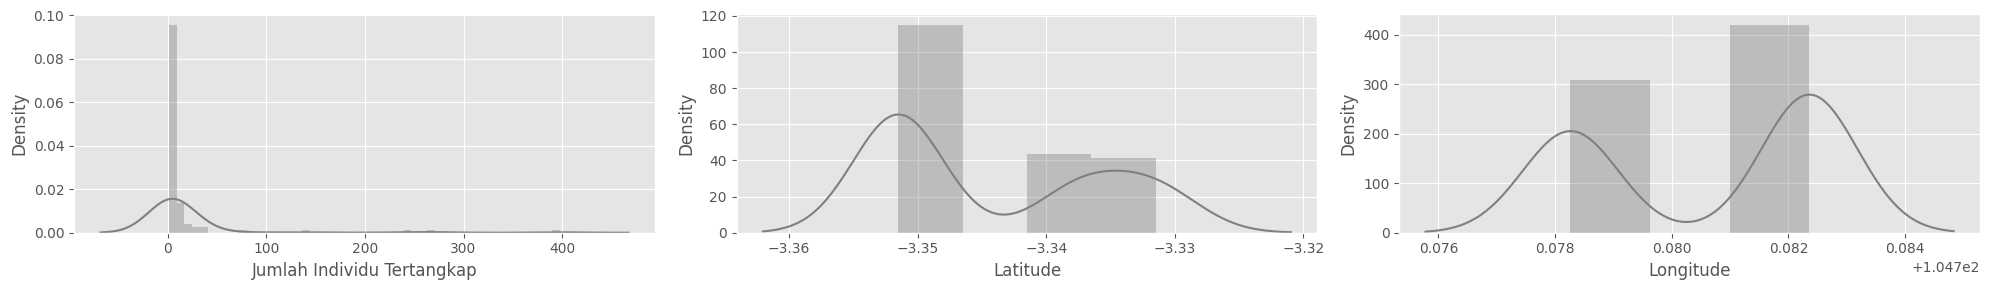

In [37]:
plt.figure(figsize = (20,3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df_lengkap[nums[i]], color = 'gray')
    plt.tight_layout()

In [38]:
print(df_lengkap['Spesies'].value_counts())

Spesies
Oxygaster anomalura             5
Labiobarbus fasciatus           4
Rasbora tornieri                4
Clupeoides borneensis           4
Kryptopterus geminus            4
Rasbora argyrotaenia            4
Rasbora cephalotaenia           3
Osteochilus vittatus            3
Kryptopterus limpok             3
Labiobarbus sabanus             3
Ambassis kopsii                 3
Osteochilus schlegelii          3
Pangasius micronemus            2
Anematichthys armatus           2
Litopenaeus vannamei            2
Cyclocheilichthys enoplos       2
Mystus gulio                    2
Hampala macrolepidota           2
Anabas testudineus              2
Barbonymus schwanenfeldii       2
Kryptopterus micronema          2
Mystus nemurus                  2
Cyclocheilichthys heteronema    2
Pseudeutropius moolenburghae    2
Pangasius polyuranodon          2
Rasbora aurotaenia              2
Macrobrachium rosenbergii       2
Rasbora wilpita                 1
Mystus nigriceps                1
Puntiu

In [39]:
#df_lengkap.head()

In [40]:
df_numeric = df_lengkap.select_dtypes(include=['number'])
df_numeric.head()

Latitude  Longitude  Jumlah Individu Tertangkap
0   -3.3515  104.78236                           5
1   -3.3515  104.78236                          16
2   -3.3515  104.78236                          21
3   -3.3515  104.78236                          28
4   -3.3515  104.78236                           5

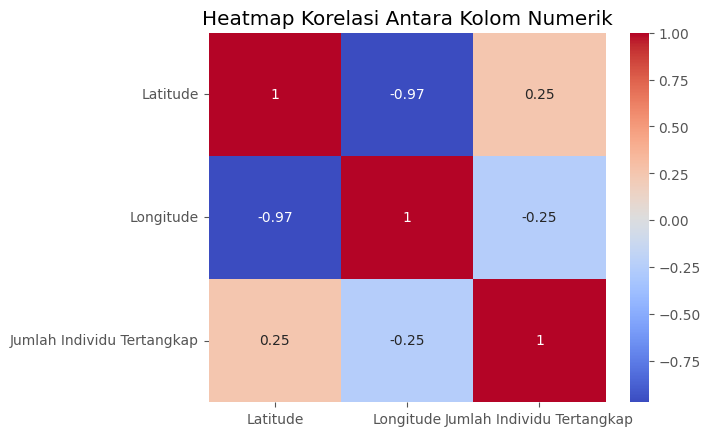

In [41]:
# menghitung dan memvisualisasikan korelasi dengan menggunakan heatmap
corr_matrix = round(df_numeric.corr(), 2) # maksud dari 2 adalah hasil korelasinya sebatas 2 angka di belakang koma

# membuat heatmap
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm") # annot = anotasi = mau menampilkan angka atau tidak, kalau True = menampilkan
                                                        # cmap = color map = memberikan warna yang sesuai selera
plt.title("Heatmap Korelasi Antara Kolom Numerik") # memberi judul grafik
plt.show() # menampilkan grafik

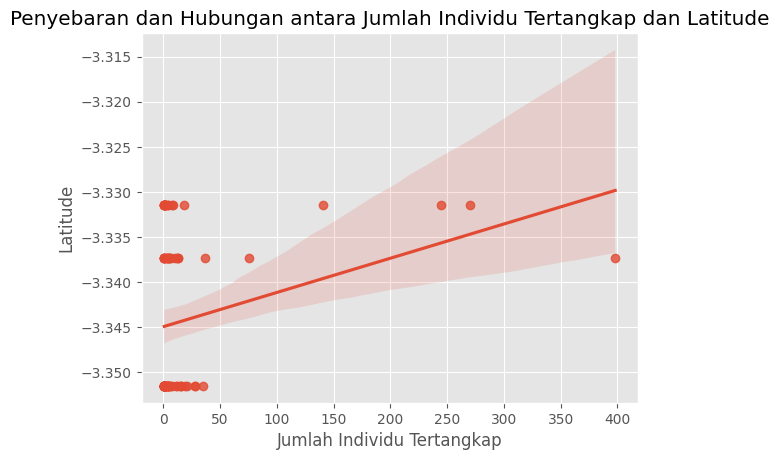

In [42]:
sns.regplot(x="Jumlah Individu Tertangkap", y="Latitude", data = df_lengkap) # regplot = regresiion plot
plt.title("Penyebaran dan Hubungan antara Jumlah Individu Tertangkap dan Latitude")
plt.show()

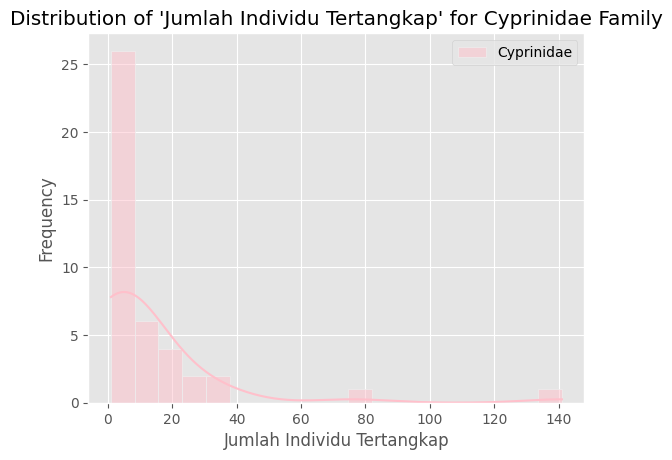

In [43]:
# Filter the DataFrame for the 'Cyprinidae' family
df_cyprinidae = df_lengkap[df_lengkap['Famili'] == 'Cyprinidae']

# Plot the distribution of 'Jumlah Individu Tertangkap' for the Cyprinidae family
sns.histplot(df_cyprinidae["Jumlah Individu Tertangkap"], kde=True, label = "Cyprinidae", color = "pink")
plt.title("Distribution of 'Jumlah Individu Tertangkap' for Cyprinidae Family")
plt.xlabel("Jumlah Individu Tertangkap")
plt.ylabel("Frequency")
plt.legend()
plt.show()

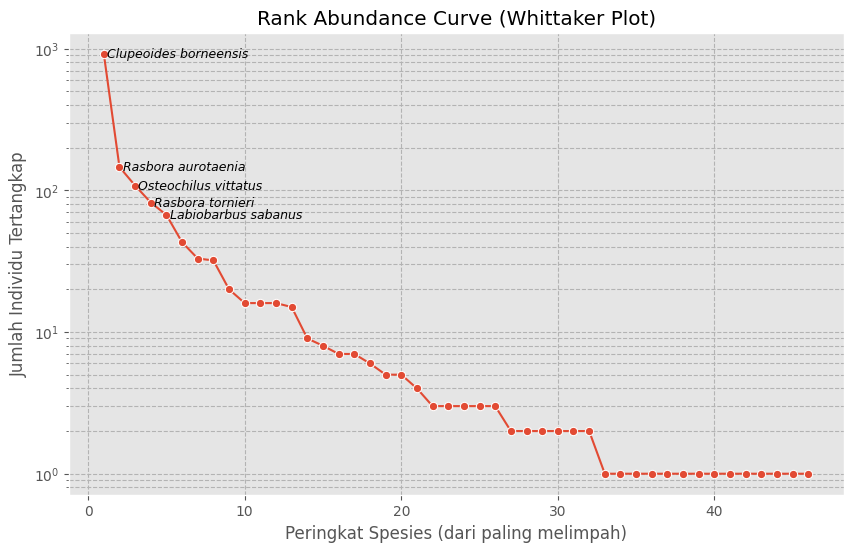

In [46]:
# Agregasi jumlah individu per spesies
species_counts = df_lengkap.groupby('Spesies')['Jumlah Individu Tertangkap'].sum().sort_values(ascending=False)

# Buat rank (peringkat)
species_counts_ranked = species_counts.reset_index()
species_counts_ranked['Rank'] = species_counts_ranked.index + 1

plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Jumlah Individu Tertangkap', data=species_counts_ranked, marker='o')
plt.title('Rank Abundance Curve (Whittaker Plot)')
plt.xlabel('Peringkat Spesies (dari paling melimpah)')
plt.ylabel('Jumlah Individu Tertangkap')
plt.yscale('log') # Seringkali sumbu Y di-log untuk data kelimpahan
plt.grid(True, which="both", ls="--", c='0.7')

# Tentukan jumlah spesies teratas yang ingin dilabeli
top_n = 5  # Misalnya, 5 spesies teratas

# Looping untuk menambahkan label pada spesies teratas
for i in range(top_n):
    spesies = species_counts_ranked.iloc[i]
    plt.text(
        x=spesies['Rank'] + 0.2,
        y=spesies['Jumlah Individu Tertangkap'],
        s=spesies['Spesies'],
        ha='left',
        va='center',
        fontsize=9,
        fontstyle='italic'
    )
plt.show()

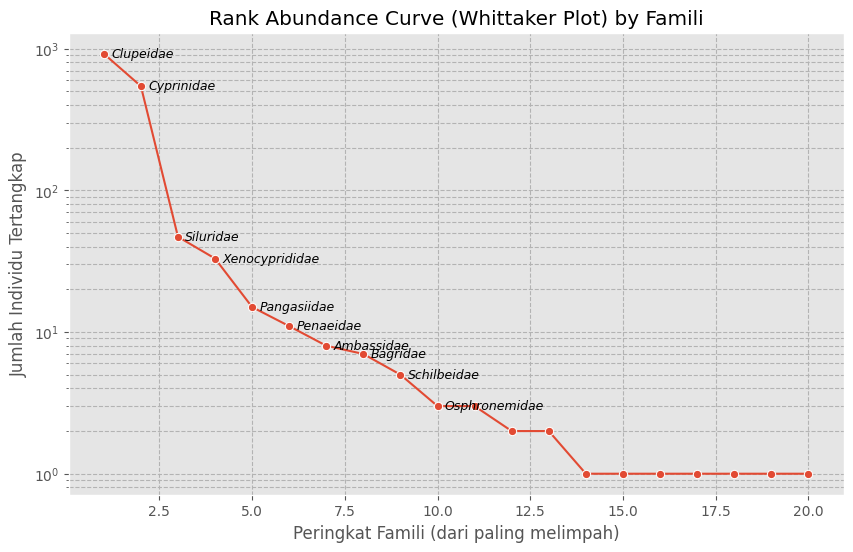

In [47]:
# Agregasi jumlah individu per famili
famili_counts_individuals = df_lengkap.groupby('Famili')['Jumlah Individu Tertangkap'].sum().sort_values(ascending=False)

# Buat rank (peringkat)
famili_counts_individuals_ranked = famili_counts_individuals.reset_index()
famili_counts_individuals_ranked['Rank'] = famili_counts_individuals_ranked.index + 1

plt.figure(figsize=(10, 6))
sns.lineplot(x='Rank', y='Jumlah Individu Tertangkap', data=famili_counts_individuals_ranked, marker='o')
plt.title('Rank Abundance Curve (Whittaker Plot) by Famili')
plt.xlabel('Peringkat Famili (dari paling melimpah)')
plt.ylabel('Jumlah Individu Tertangkap')
plt.yscale('log') # Seringkali sumbu Y di-log untuk data kelimpahan
plt.grid(True, which="both", ls="--", c='0.7')

# Tentukan jumlah spesies teratas yang ingin dilabeli
top_n = 10  # Misalnya, 10 famili teratas

# Looping untuk menambahkan label pada famili teratas
for i in range(top_n):
    famili = famili_counts_individuals_ranked.iloc[i]
    plt.text(
        x=famili['Rank'] + 0.2,
        y=famili['Jumlah Individu Tertangkap'],
        s=famili['Famili'],
        ha='left',
        va='center',
        fontsize=9,
        fontstyle='italic'
    )
plt.show()

In [48]:
print(df_lengkap['Famili'].value_counts())

Famili
Cyprinidae         42
Siluridae           9
Xenocyprididae      5
Bagridae            5
Ambassidae          4
Clupeidae           4
Pangasiidae         4
Penaeidae           3
Anabantidae         2
Schilbeidae         2
Palaemonidae        2
Osphronemidae       2
Clariidae           1
Helostomatidae      1
Polynemidae         1
Pristolepididae     1
Botiidae            1
Channidae           1
Loricariidae        1
Nemacheilidae       1
Name: count, dtype: int64


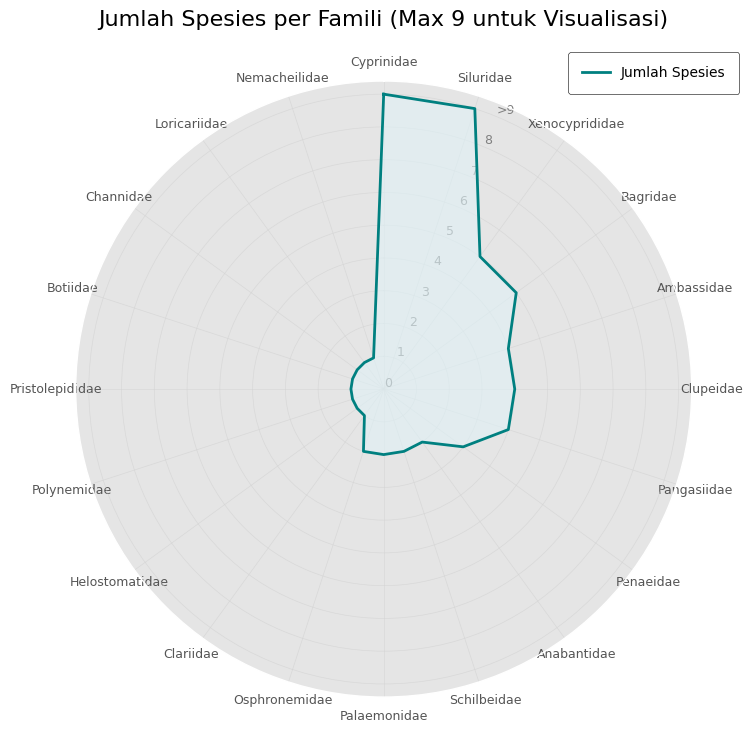

In [49]:
# Data famili_species_count yang Anda berikan
famili_species_count = pd.Series({
    'Cyprinidae': 42,
    'Siluridae': 9,
    'Xenocyprididae': 5,
    'Bagridae': 5,
    'Ambassidae': 4,
    'Clupeidae': 4,
    'Pangasiidae': 4,
    'Penaeidae': 3,
    'Anabantidae': 2,
    'Schilbeidae': 2,
    'Palaemonidae': 2,
    'Osphronemidae': 2,
    'Clariidae': 1,
    'Helostomatidae': 1,
    'Polynemidae': 1,
    'Pristolepididae': 1,
    'Botiidae': 1,
    'Channidae': 1,
    'Loricariidae': 1,
    'Nemacheilidae': 1
}).sort_values(ascending=False) # Urutkan dari terbesar ke terkecil

# --- 1. Persiapan Data dengan Capping ---
# Tentukan batas atas (misal, 10 atau 9 sesuai contoh Anda)
max_display_value = 9 # Semua nilai di atas 9 akan dianggap 9

# Buat nilai yang di-cap untuk plotting
# Jika nilai > max_display_value, jadikan max_display_value
# Jika tidak, gunakan nilai aslinya
values_capped = famili_species_count.apply(lambda x: min(x, max_display_value)).tolist()

# Labels tetap sama
labels = famili_species_count.index.tolist()

# Tambahkan nilai pertama di akhir agar plot "tertutup"
values_capped_closed = values_capped + values_capped[:1]
labels_closed = labels + labels[:1]

# Hitung sudut untuk setiap sumbu
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles_closed = angles + angles[:1] # Sudut juga harus ditutup

# --- 2. Buat Radar Chart ---
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Warna dan gaya plot
line_color = '#008080'  # Teal gelap
fill_color = '#E0F2F7'  # Biru muda (sangat terang) atau lightgrey
grid_color = '#E0E0E0'  # Abu-abu terang untuk grid

# Plot garis utama
ax.plot(angles_closed, values_capped_closed, color=line_color, linewidth=2, label='Jumlah Spesies')
ax.fill(angles_closed, values_capped_closed, color=fill_color, alpha=0.6) # Isi area

# --- 3. Kustomisasi Tampilan ---
# Rotasi plot agar sumbu pertama di posisi kanan (atau sesuaikan)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Label sumbu radial (nama famili)
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)

# Label sumbu Y (nilai jumlah spesies)
# Karena kita sudah cap, max_display_value + 1 (misal 10) adalah batas atas yang bagus
yticks_val = np.arange(0, max_display_value + 1, 1) # Range 0 sampai max_display_value, interval 1
ax.set_yticks(yticks_val)

# Custom YtickLabels untuk menunjukkan nilai yang di-cap
yticklabels = [f'{int(y)}' for y in yticks_val]
# Ubah label terakhir menjadi ">N" jika N adalah max_display_value
if max_display_value in yticks_val: # Pastikan max_display_value ada di yticks_val
    yticklabels[-1] = f'>{max_display_value}' # Ini akan jadi '>10' jika max_display_value 10

ax.set_yticklabels(yticklabels, color="gray", size=9)
ax.tick_params(axis='y', pad=15) # Menggeser label Y axis

# Grid
ax.grid(True, linestyle='-', linewidth=0.5, color='lightgray', alpha=0.7)
ax.set_axisbelow(True)

# Judul
ax.set_title(f'Jumlah Spesies per Famili (Max {max_display_value} untuk Visualisasi)', pad=40, fontsize=16)

# Legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.07), frameon=True, edgecolor='black', facecolor='white', borderpad=1, borderaxespad=1)

plt.show()

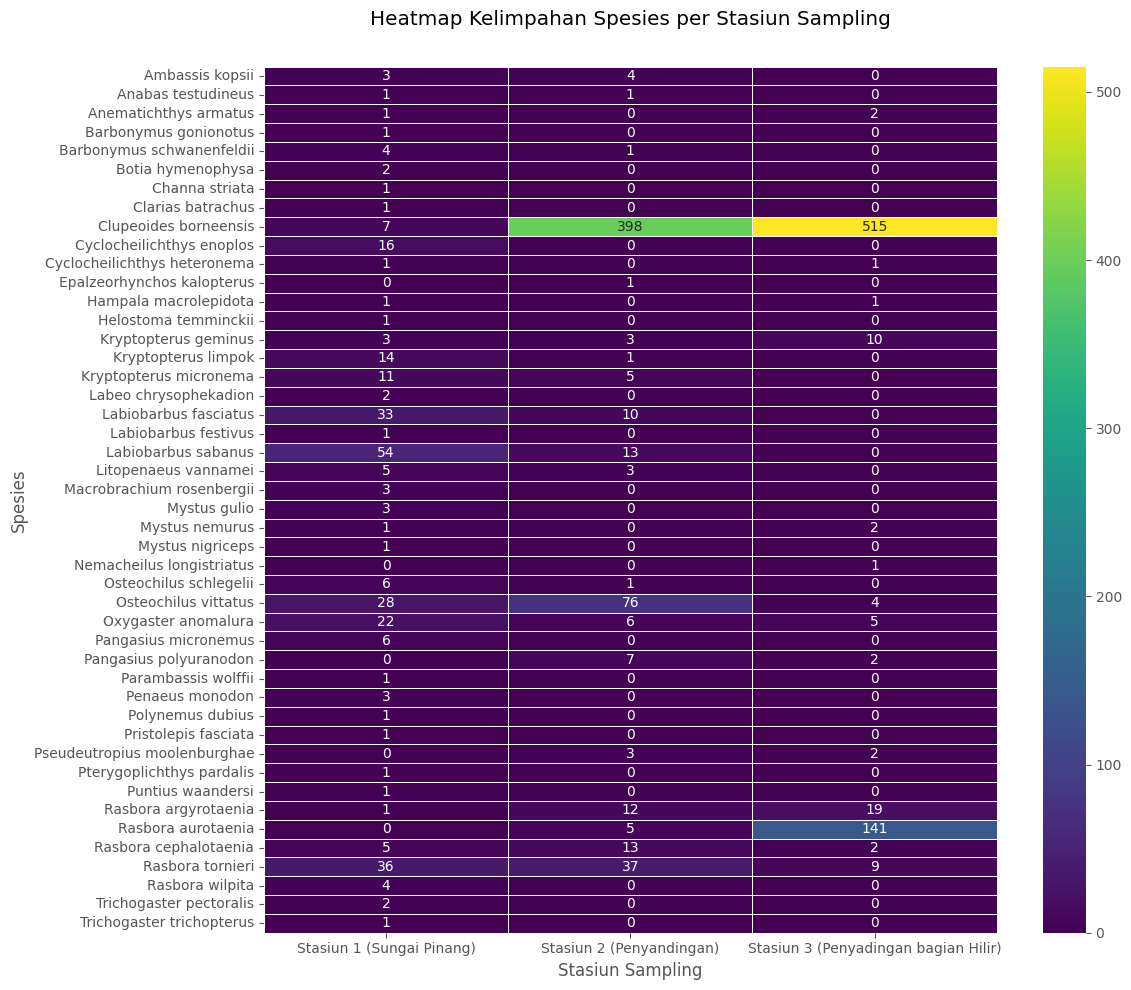

In [50]:
# Buat pivot table: baris = spesies, kolom = stasiun, nilai = jumlah individu
species_location_pivot = df_lengkap.pivot_table(
    index='Spesies',
    columns='Stasiun Sampling',
    values='Jumlah Individu Tertangkap',
    aggfunc='sum'
).fillna(0) # Isi NaN dengan 0 jika spesies tidak ditemukan di stasiun tertentu

plt.figure(figsize=(12, 10))
sns.heatmap(species_location_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap Kelimpahan Spesies per Stasiun Sampling', pad=30)
plt.xlabel('Stasiun Sampling')
plt.ylabel('Spesies')
plt.tight_layout()
plt.show()

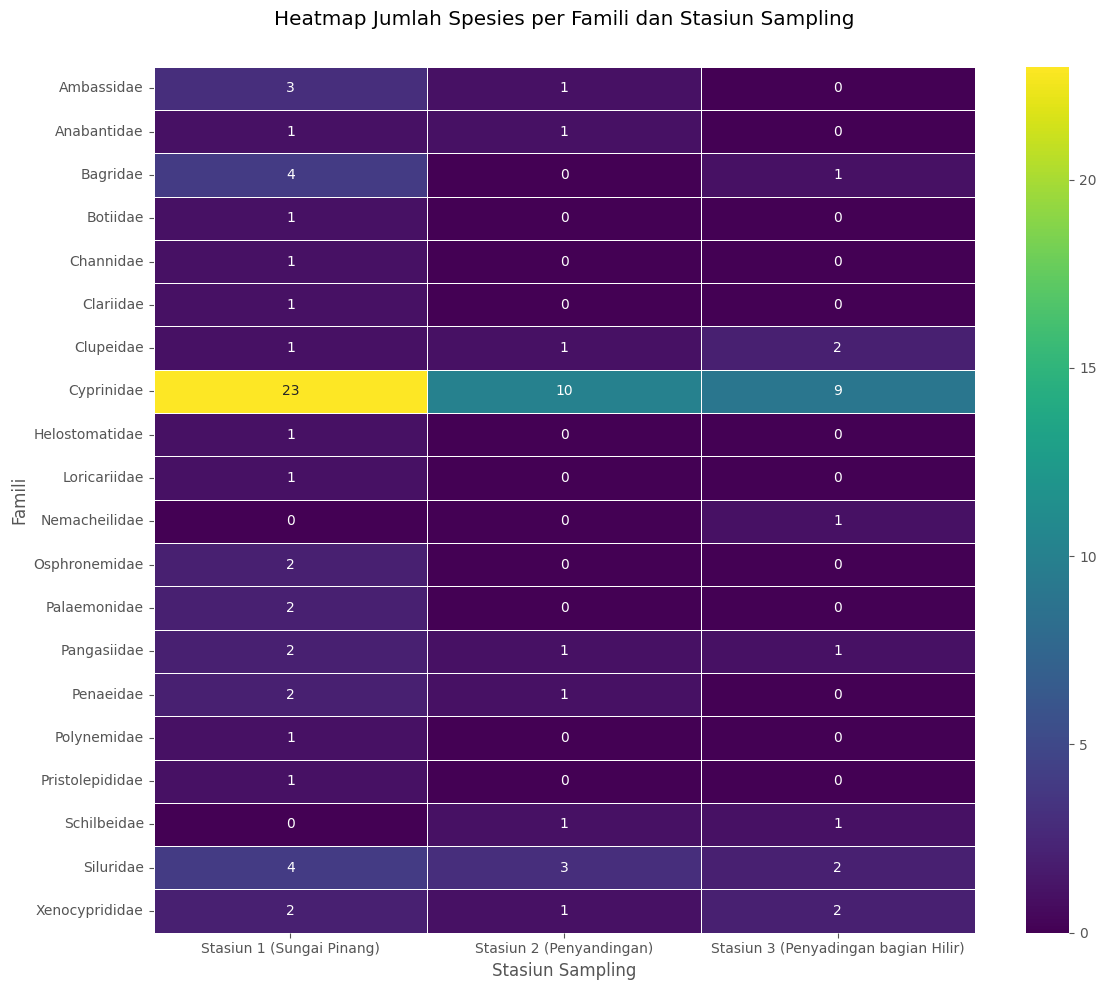

In [51]:
# Buat pivot table: baris = famili, kolom = stasiun, nilai = jumlah spesies
famili_location_pivot = df_lengkap.pivot_table(
    index='Famili',
    columns='Stasiun Sampling',
    values='Spesies',
    aggfunc='count' # Changed aggfunc to 'count'
).fillna(0) # Isi NaN dengan 0 jika famili tidak ditemukan di stasiun tertentu

plt.figure(figsize=(12, 10))
sns.heatmap(famili_location_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap Jumlah Spesies per Famili dan Stasiun Sampling', pad=30) # Changed title
plt.xlabel('Stasiun Sampling')
plt.ylabel('Famili')
plt.tight_layout()
plt.show()

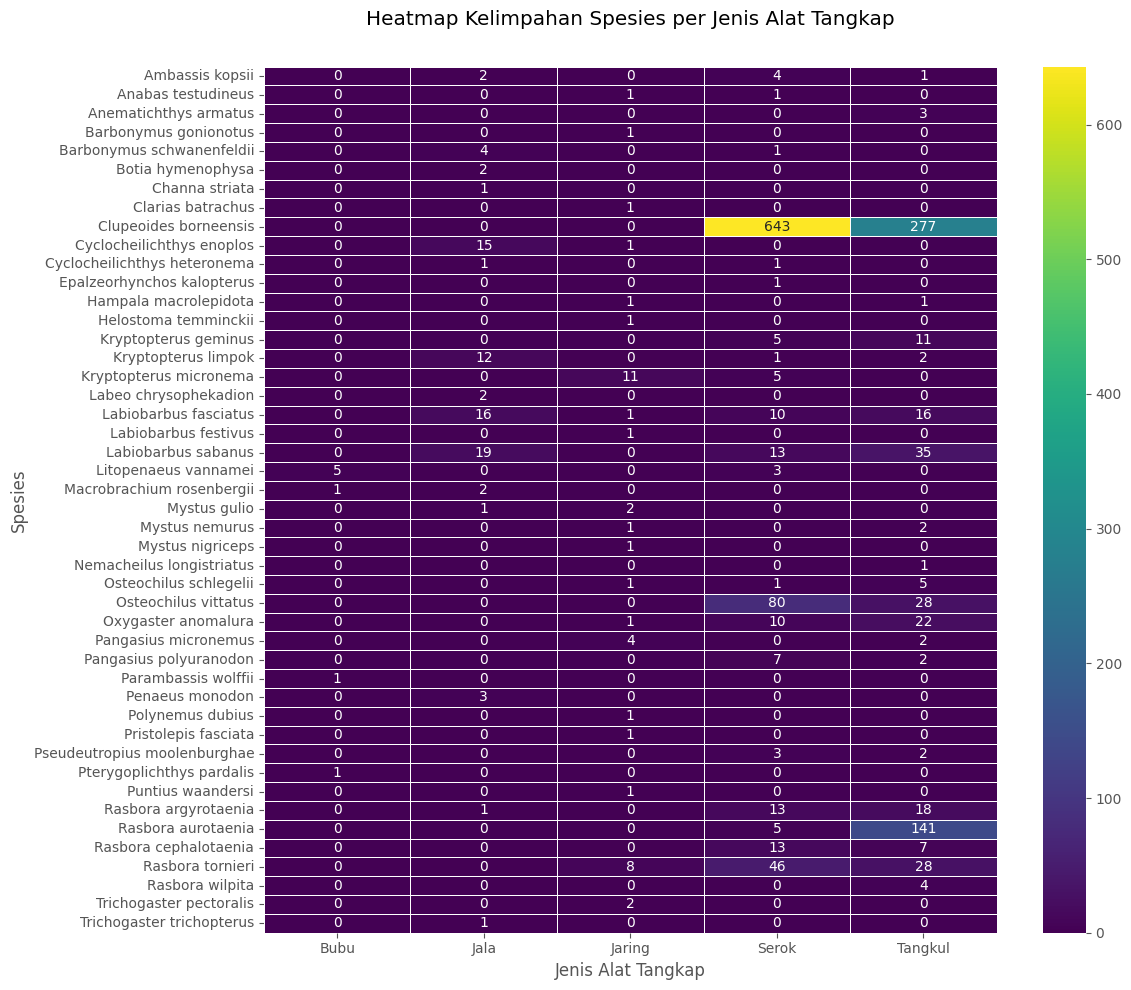

In [52]:
# Buat pivot table: baris = spesies, kolom = alat tangkap, nilai = jumlah individu
species_location_pivot = df_lengkap.pivot_table(
    index='Spesies',
    columns='Jenis Alat Tangkap',
    values='Jumlah Individu Tertangkap',
    aggfunc='sum'
).fillna(0) # Isi NaN dengan 0 jika spesies tidak ditemukan di stasiun tertentu

plt.figure(figsize=(12, 10))
sns.heatmap(species_location_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap Kelimpahan Spesies per Jenis Alat Tangkap', pad=30)
plt.xlabel('Jenis Alat Tangkap')
plt.ylabel('Spesies')
plt.tight_layout()
plt.show()

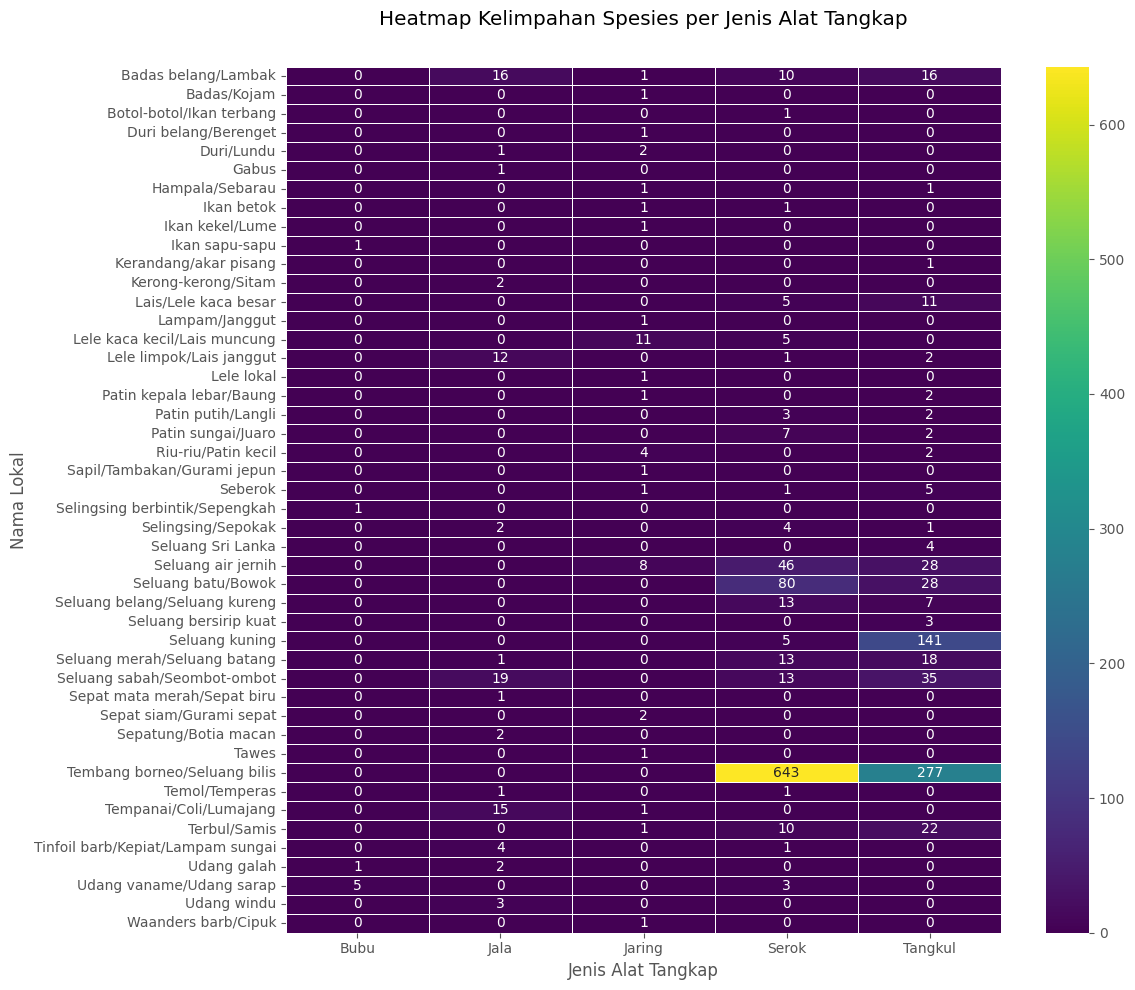

In [53]:
# Buat pivot table: baris = nama lokal, kolom = alat tangkap, nilai = jumlah individu
species_location_pivot = df_lengkap.pivot_table(
    index='Nama Lokal',
    columns='Jenis Alat Tangkap',
    values='Jumlah Individu Tertangkap',
    aggfunc='sum'
).fillna(0) # Isi NaN dengan 0 jika spesies tidak ditemukan di stasiun tertentu

plt.figure(figsize=(12, 10))
sns.heatmap(species_location_pivot, cmap='viridis', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap Kelimpahan Spesies per Jenis Alat Tangkap', pad=30)
plt.xlabel('Jenis Alat Tangkap')
plt.ylabel('Nama Lokal')
plt.tight_layout()
plt.show()

## 4. Multivariate Analysis

In [54]:
# df_stasiun_summary akan berisi rata-rata Latitude, Longitude, dll. per stasiun
df_stasiun_summary = df_lengkap.groupby('Stasiun Sampling').agg(
    Latitude=('Latitude', 'mean'), # Ambil rata-rata Latitude per stasiun
    Longitude=('Longitude', 'mean'), # Ambil rata-rata Longitude per stasiun
    Total_Individu=('Jumlah Individu Tertangkap', 'sum'), # Total individu per stasiun
    Jumlah_Spesies=('Spesies', 'nunique') # Jumlah spesies unik per stasiun
).reset_index()

# Gabungkan dengan hasil indeks keanekaragaman
df_stasiun_summary = df_stasiun_summary.merge(
    diversity_results_per_station,
    on='Stasiun Sampling',
    how='left'
)
print("\nDataFrame Ringkasan per Stasiun dengan Indeks Keanekaragaman:")
display(df_stasiun_summary.head())


DataFrame Ringkasan per Stasiun dengan Indeks Keanekaragaman:


Stasiun Sampling  Latitude  Longitude  Total_Individu  \
0             Stasiun 1 (Sungai Pinang)  -3.35150  104.78236             290   
1              Stasiun 2 (Penyandingan)  -3.33728  104.77825             600   
2  Stasiun 3 (Penyadingan bagian Hilir)  -3.33150  104.77828             716   

   Jumlah_Spesies  Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D  
0              41          2.870806    0.773058             0.088228  
1              20          1.362296    0.454746             0.461983  
2              15          0.941292    0.347590             0.557317

In [55]:
def classify_water_status(row):
    h = row['Shannon_Wiener_H'] # Pastikan nama kolom sesuai
    e = row['Evenness_J']      # Pastikan nama kolom sesuai
    d = row['Simpson_Dominance_D'] # Pastikan nama kolom sesuai

    # --- Klasifikasi Per Indeks (Pilih satu versi Evenness) ---
    h_class = "Rendah" if h < 1 else ("Sedang" if h <= 3 else "Tinggi")

    # Misal, Anda memilih versi detail untuk Evenness:
    if e >= 0.90: e_class = "Sangat tinggi"
    elif e >= 0.70: e_class = "Tinggi"
    elif e >= 0.50: e_class = "Sedang"
    elif e >= 0.25: e_class = "Rendah"
    else: e_class = "Sangat rendah"

    d_class = "Tidak ada dominansi" if d < 0.5 else "Ada dominansi"

    # --- Logika Kombinasi Status Perairan ---
    if h_class == "Tinggi" and e_class in ["Tinggi", "Sangat tinggi"] and d_class == "Tidak ada dominansi":
        overall_status = "Sangat Sehat"
    elif h_class == "Rendah" and e_class in ["Rendah", "Sangat rendah"] and d_class == "Ada dominansi":
        overall_status = "Kurang Sehat"
    # --- Tambahan untuk Status Menengah ---
    elif h_class == "Sedang" and e_class in ["Sedang", "Tinggi", "Sangat tinggi"] and d_class == "Tidak ada dominansi":
        overall_status = "Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)"
    elif h_class == "Sedang" and e_class in ["Rendah", "Sangat rendah"] and d_class == "Tidak ada dominansi":
        overall_status = "Cukup Sehat (Keanekaragaman Sedang, Kemerataan Rendah, Tanpa Dominansi)"
    elif d_class == "Ada dominansi": # Prioritaskan dominansi sebagai indikator negatif kuat
        overall_status = "Kritis (Ada Dominansi, Perlu Perhatian)"
    else:
        overall_status = "Status Campuran (Perlu Peninjauan Individual)" # Untuk kasus yang tidak masuk kategori jelas

    return overall_status

df_stasiun_summary['Status_Perairan'] = df_stasiun_summary.apply(classify_water_status, axis=1)
print("\nDataFrame Ringkasan per Stasiun dengan Status Perairan:")
display(df_stasiun_summary.head())
print(df_stasiun_summary['Status_Perairan'].value_counts())


DataFrame Ringkasan per Stasiun dengan Status Perairan:


Stasiun Sampling  Latitude  Longitude  Total_Individu  \
0             Stasiun 1 (Sungai Pinang)  -3.35150  104.78236             290   
1              Stasiun 2 (Penyandingan)  -3.33728  104.77825             600   
2  Stasiun 3 (Penyadingan bagian Hilir)  -3.33150  104.77828             716   

   Jumlah_Spesies  Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D  \
0              41          2.870806    0.773058             0.088228   
1              20          1.362296    0.454746             0.461983   
2              15          0.941292    0.347590             0.557317   

                                     Status_Perairan  
0  Cukup Sehat (Keanekaragaman Sedang, Kemerataan...  
1  Cukup Sehat (Keanekaragaman Sedang, Kemerataan...  
2                                       Kurang Sehat

Status_Perairan
Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)      1
Cukup Sehat (Keanekaragaman Sedang, Kemerataan Rendah, Tanpa Dominansi)    1
Kurang Sehat                                                               1
Name: count, dtype: int64


In [56]:
df_stasiun_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stasiun Sampling     3 non-null      object 
 1   Latitude             3 non-null      float64
 2   Longitude            3 non-null      float64
 3   Total_Individu       3 non-null      int64  
 4   Jumlah_Spesies       3 non-null      int64  
 5   Shannon_Wiener_H     3 non-null      float64
 6   Evenness_J           3 non-null      float64
 7   Simpson_Dominance_D  3 non-null      float64
 8   Status_Perairan      3 non-null      object 
dtypes: float64(5), int64(2), object(2)
memory usage: 348.0+ bytes


In [57]:
df_final = pd.merge(df_lengkap, df_stasiun_summary, on='Stasiun Sampling', how='left', suffixes=('', '_summary'))

In [58]:
df_final.value_counts()

Waktu Sampling   Stasiun Sampling                      Desa           Latitude  Longitude  Jenis Alat Tangkap  Spesies                       Jumlah Individu Tertangkap  Famili        Nama Lokal                      Latitude_summary  Longitude_summary  Total_Individu  Jumlah_Spesies  Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D  Status_Perairan                                                      
April s.d. Juli  Stasiun 1 (Sungai Pinang)             Sungai Pinang  -3.3515   104.78236  Bubu                Litopenaeus vannamei          5                           Penaeidae     Udang vaname/Udang sarap        -3.3515           104.78236          290             41              2.870806          0.773058    0.088228             Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)    1
                                                                                                               Macrobrachium rosenbergii     1                           Palaemonidae  Udang galah                     -3.3515           104.78236          290             41              2.870806          0.773058    0.088228             Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)    1
                                                                                                               Parambassis wolffii           1                           Ambassidae    Selingsing berbintik/Sepengkah  -3.3515           104.78236          290             41              2.870806          0.773058    0.088228             Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)    1
                                                                                                               Pterygoplichthys pardalis     1                           Loricariidae  Ikan sapu-sapu                  -3.3515           104.78236          290             41              2.870806          0.773058    0.088228             Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)    1
                                                                                           Jala                Ambassis kopsii               2                           Ambassidae    Selingsing/Sepokak              -3.3515           104.78236          290             41              2.870806          0.773058    0.088228             Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)    1
                                                                                                                                                                                                                                                                                                                                                                                                                       ..
                 Stasiun 3 (Penyadingan bagian Hilir)  Penyandingan   -3.3315   104.77828  Tangkul             Pangasius polyuranodon        2                           Pangasiidae   Patin sungai/Juaro              -3.3315           104.77828          716             15              0.941292          0.347590    0.557317             Kurang Sehat                                                             1
                                                                                                               Pseudeutropius moolenburghae  2                           Schilbeidae   Patin putih/Langli              -3.3315           104.77828          716             15              0.941292          0.347590    0.557317             Kurang Sehat                                                             1
                                                                                                               Rasbora argyrotaenia          18                          Cyprinidae    Seluang merah/Seluang batang    -3.3315           104.77828          716             15              0.941292          0.347590    0

In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Waktu Sampling              92 non-null     object 
 1   Stasiun Sampling            92 non-null     object 
 2   Desa                        92 non-null     object 
 3   Latitude                    92 non-null     float64
 4   Longitude                   92 non-null     float64
 5   Jenis Alat Tangkap          92 non-null     object 
 6   Spesies                     92 non-null     object 
 7   Jumlah Individu Tertangkap  92 non-null     int64  
 8   Famili                      92 non-null     object 
 9   Nama Lokal                  92 non-null     object 
 10  Latitude_summary            92 non-null     float64
 11  Longitude_summary           92 non-null     float64
 12  Total_Individu              92 non-null     int64  
 13  Jumlah_Spesies              92 non-nu

In [60]:
# Membuang kolom sama/identik
df_final = df_final.drop(columns=["Latitude", "Longitude"], axis=1, errors='ignore')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Waktu Sampling              92 non-null     object 
 1   Stasiun Sampling            92 non-null     object 
 2   Desa                        92 non-null     object 
 3   Jenis Alat Tangkap          92 non-null     object 
 4   Spesies                     92 non-null     object 
 5   Jumlah Individu Tertangkap  92 non-null     int64  
 6   Famili                      92 non-null     object 
 7   Nama Lokal                  92 non-null     object 
 8   Latitude_summary            92 non-null     float64
 9   Longitude_summary           92 non-null     float64
 10  Total_Individu              92 non-null     int64  
 11  Jumlah_Spesies              92 non-null     int64  
 12  Shannon_Wiener_H            92 non-null     float64
 13  Evenness_J                  92 non-nu

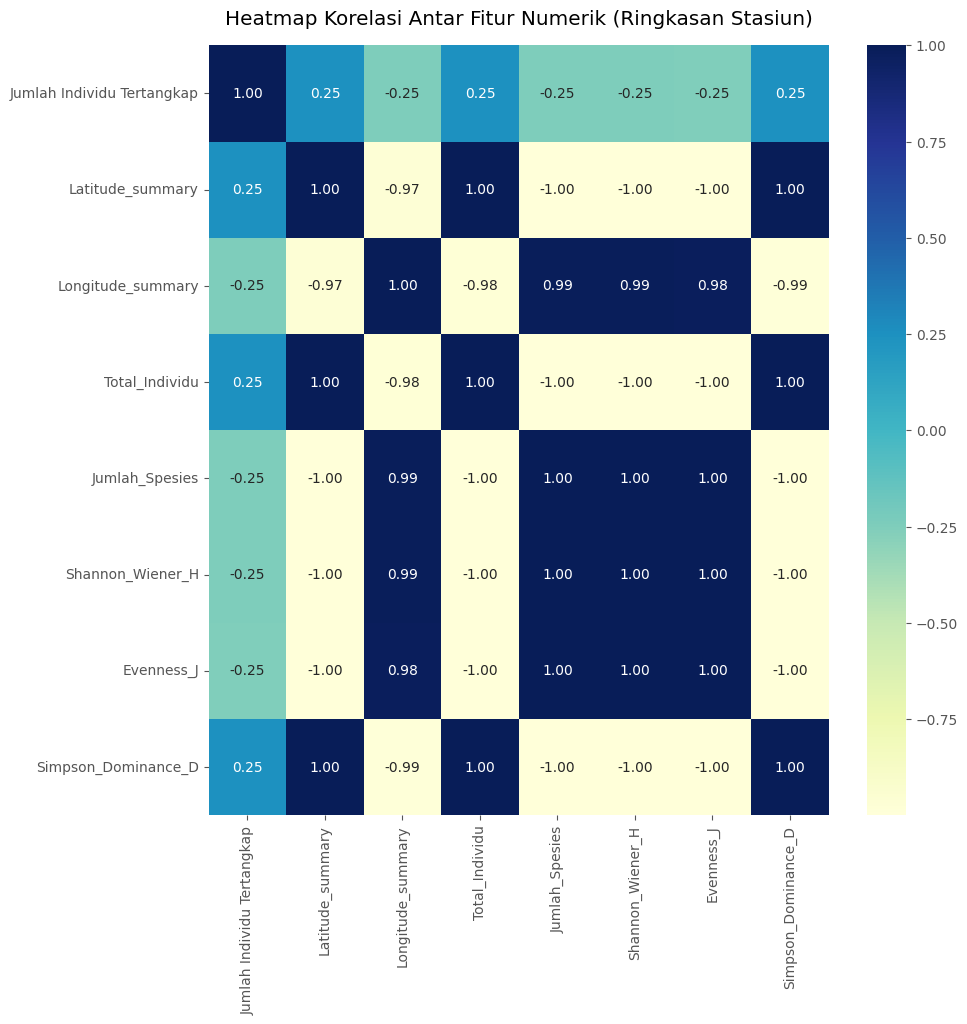

In [61]:
# Features Correlation Heatmap

# Select only numeric columns before calculating correlation
df_numeric_summary = df_final.select_dtypes(include=np.number)

plt.figure(figsize=(10,10))
sns.heatmap(df_numeric_summary.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur Numerik (Ringkasan Stasiun)", pad=15)
plt.show()

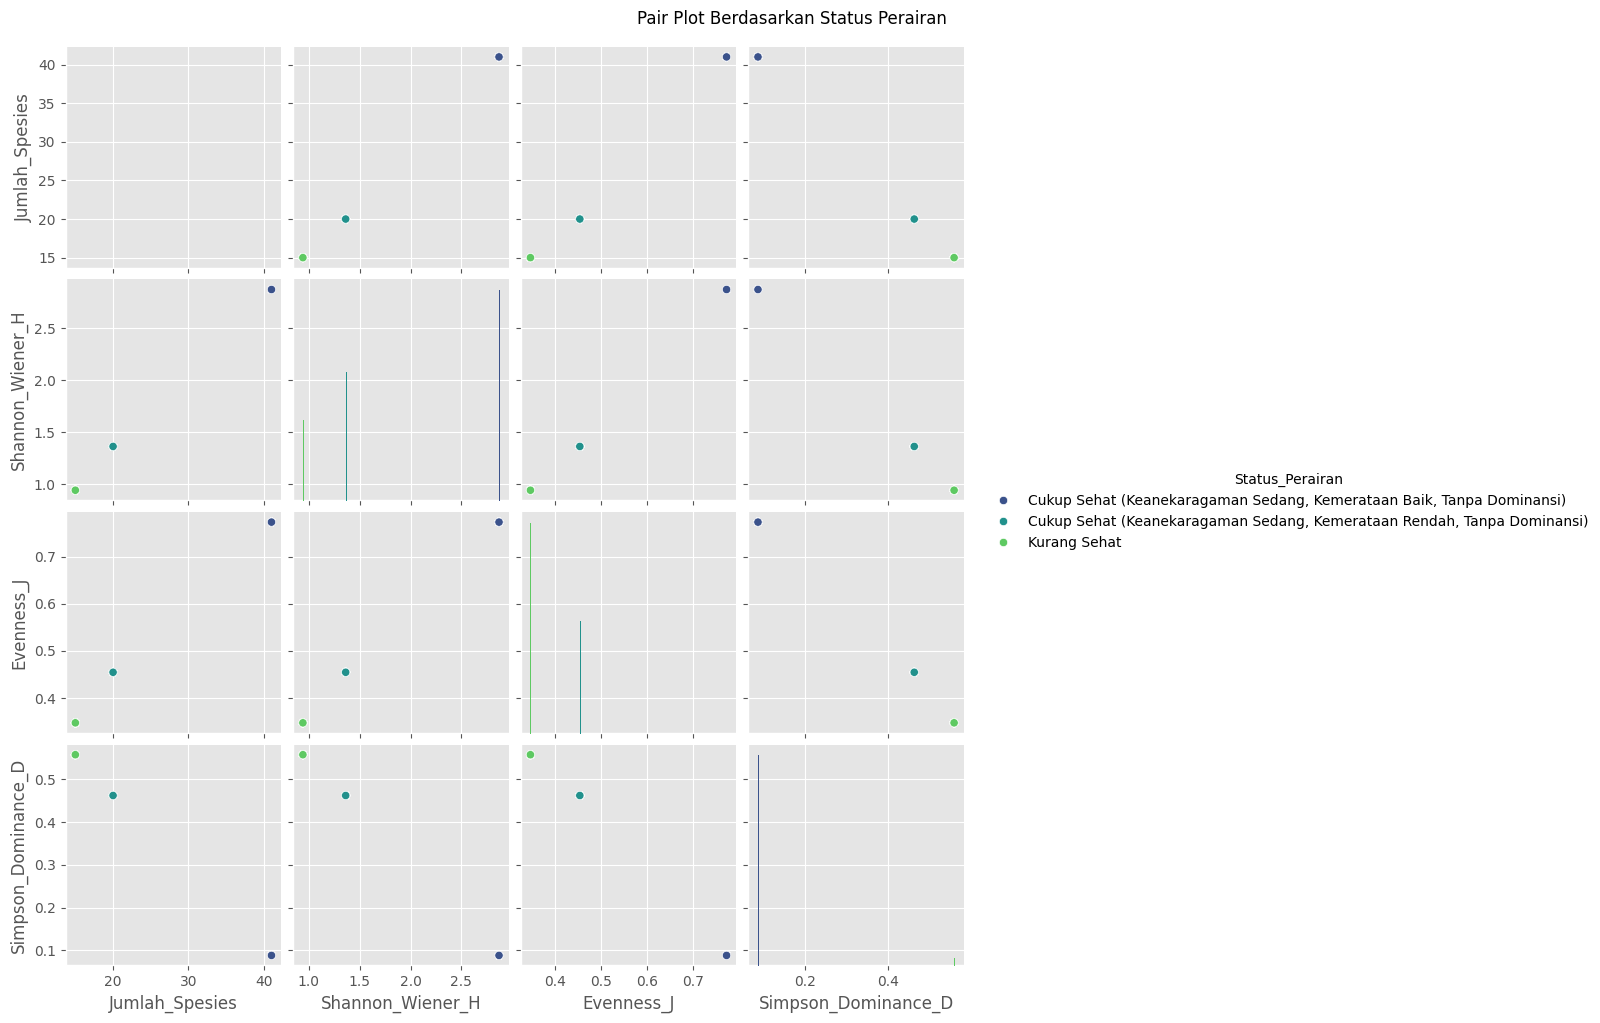

In [62]:
# Membuat Pair Plot
# hue='Status_Perairan' akan mewarnai titik berdasarkan status perairan
numerical_cols = ['Jumlah_Spesies', 'Shannon_Wiener_H', 'Evenness_J', 'Simpson_Dominance_D']
sns.pairplot(df_final, vars=numerical_cols, hue='Status_Perairan', palette='viridis')
plt.suptitle('Pair Plot Berdasarkan Status Perairan', y=1.02)
plt.show()

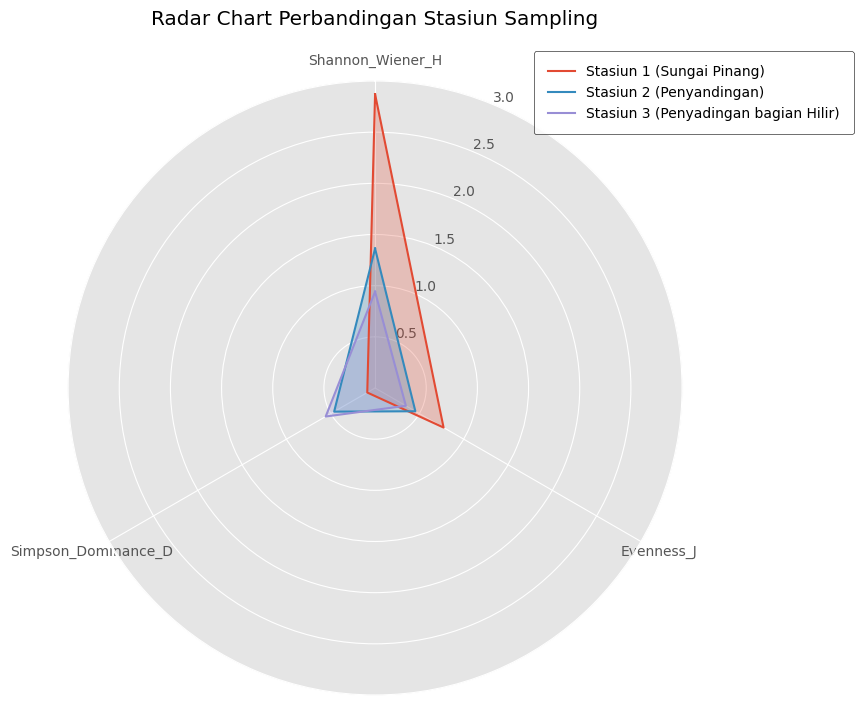

In [63]:
import numpy as np

# Agregasi data untuk setiap stasiun sampling
df_radar = df_final.groupby('Stasiun Sampling')[['Shannon_Wiener_H', 'Evenness_J', 'Simpson_Dominance_D']].mean().reset_index()
stasiun = df_radar['Stasiun Sampling'].tolist()
metrics = df_radar.columns[1:].tolist()

# Membuat plot
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1] # Lengkapi lingkaran
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df_radar.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Stasiun Sampling'])
    ax.fill(angles, values, alpha=0.25)

# Konfigurasi plot
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
plt.title('Radar Chart Perbandingan Stasiun Sampling', pad=40)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.07), frameon=True, edgecolor='black', facecolor='white', borderpad=1, borderaxespad=1)
plt.show()

# PREPROCESSING

## Train-Test Split

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode label
df_final['Status_Perairan_Label'] = LabelEncoder().fit_transform(df_final['Status_Perairan'])

# Pilih fitur
features = ['Shannon_Wiener_H', 'Evenness_J', 'Simpson_Dominance_D', 'Latitude_summary', 'Longitude_summary', 'Jenis Alat Tangkap', 'Famili', 'Spesies']
X = df_final[features]
y = df_final['Status_Perairan_Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
print(df_final['Status_Perairan_Label'])
print("="*80)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

0     0
1     0
2     0
3     0
4     0
     ..
87    2
88    2
89    2
90    2
91    2
Name: Status_Perairan_Label, Length: 92, dtype: int64
X_train shape: (55, 8)
X_test shape: (37, 8)


In [65]:
print(X_train.head())

    Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D  Latitude_summary  \
85          0.941292    0.347590             0.557317           -3.3315   
77          0.941292    0.347590             0.557317           -3.3315   
12          2.870806    0.773058             0.088228           -3.3515   
33          2.870806    0.773058             0.088228           -3.3515   
49          2.870806    0.773058             0.088228           -3.3515   

    Longitude_summary Jenis Alat Tangkap           Famili  \
85          104.77828              Serok   Xenocyprididae   
77          104.77828            Tangkul       Cyprinidae   
12          104.78236            Tangkul        Clupeidae   
33          104.78236             Jaring  Pristolepididae   
49          104.78236               Bubu       Ambassidae   

                  Spesies  
85    Oxygaster anomalura  
77     Rasbora aurotaenia  
12  Clupeoides borneensis  
33   Pristolepis fasciata  
49    Parambassis wolffii  


In [66]:
print(X_test.head())

    Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D  Latitude_summary  \
67          1.362296    0.454746             0.461983          -3.33728   
74          0.941292    0.347590             0.557317          -3.33150   
38          2.870806    0.773058             0.088228          -3.35150   
45          2.870806    0.773058             0.088228          -3.35150   
35          2.870806    0.773058             0.088228          -3.35150   

    Longitude_summary Jenis Alat Tangkap         Famili  \
67          104.77825              Serok     Ambassidae   
74          104.77828            Tangkul     Cyprinidae   
38          104.78236               Jala     Cyprinidae   
45          104.78236               Jala  Osphronemidae   
35          104.78236               Jala     Cyprinidae   

                      Spesies  
67            Ambassis kopsii  
74      Hampala macrolepidota  
38      Labeo chrysophekadion  
45  Trichogaster trichopterus  
35      Labiobarbus fasciatus  


In [67]:
print(y_train.head())

85    2
77    2
12    0
33    0
49    0
Name: Status_Perairan_Label, dtype: int64


In [68]:
print(y_test.head())

67    1
74    2
38    0
45    0
35    0
Name: Status_Perairan_Label, dtype: int64


## Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Select only numerical columns for scaling
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

scaler = MinMaxScaler()
X_train_mm_scaler = scaler.fit_transform(X_train_numeric)
X_test_mm_scaler = scaler.transform(X_test_numeric)

scaler2 = RobustScaler()
X_train_rb_scaled = scaler2.fit_transform(X_train_numeric)
X_test_rb_scaled = scaler2.transform(X_test_numeric)

# Konversi kembali ke DataFrame agar mudah digabungkan
X_train_scaled_numeric_df = pd.DataFrame(X_train_rb_scaled, columns=X_train_numeric.columns, index=X_train.index)
X_test_scaled_numeric_df = pd.DataFrame(X_test_rb_scaled, columns=X_test_numeric.columns, index=X_test.index)

print(X_train_mm_scaler)
print("="*80)
print('\n')
print(X_test_mm_scaler)
print("="*80)
print('\n')
print(X_train_rb_scaled)
print("="*80)
print('\n')
print(X_test_rb_scaled)

[[0.         0.         1.         1.         0.00729927]
 [0.         0.         1.         1.         0.00729927]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [0.21819197 0.25185336 0.79676804 0.711      0.        ]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [1.         1.         0.         0.         1.        ]
 [0.21819197 0.25185336 0.79676804 0.711      0.        ]
 [1.         1.         0.         0.         1.        ]
 [0.         0.         1.         1.         0.00729927]
 [0.         0.         1.         1.         0.00729927]
 [1.         1.         0.         0.         1.        ]
 [0.21819197 0

## One Hot Encoding

In [70]:
# Mapping alat tangkap ke fungsi
metode_operasi = { 'Serok': 'Aktif',
                  'Tangkul': 'Aktif',
                   'Jaring': 'Pasif',  # karena jaring insang
                   'Jala': 'Aktif',
                   'Bubu': 'Pasif'
}

# Terapkan ke train dan test
X_train['Metode_Operasi'] = X_train['Jenis Alat Tangkap'].map(metode_operasi)
X_test['Metode_Operasi'] = X_test['Jenis Alat Tangkap'].map(metode_operasi)

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode 'Metode_Operasi'
encoder_metode = OneHotEncoder(handle_unknown='ignore')
encoder_metode.fit(X_train[['Metode_Operasi']])

X_train_metode = encoder_metode.transform(X_train[['Metode_Operasi']]).toarray()
X_test_metode = encoder_metode.transform(X_test[['Metode_Operasi']]).toarray()

metode_cols = encoder_metode.get_feature_names_out(['Metode_Operasi'])
X_train_metode_df = pd.DataFrame(X_train_metode, columns=metode_cols, index=X_train.index)
X_test_metode_df = pd.DataFrame(X_test_metode, columns=metode_cols, index=X_test.index)

# Gabungkan ke dataset
X_train_final = pd.concat([X_train_scaled_numeric_df,
                           X_train_metode_df], axis=1)

X_test_final = pd.concat([X_test_scaled_numeric_df,
                          X_test_metode_df], axis=1) # DISCLAIMER: Fitur Famili dan Spesies OHE dihapus karena menyebabkan akurasi tidak realistis (1.00), yang mengindikasikan mereka bertindak sebagai 'perfect identifier' di dataset kecil.
print("Shape X_train_final (setelah scaling & concat final):", X_train_final.shape)
print("Shape X_test_final (setelah scaling & concat final):", X_test_final.shape)

Shape X_train_final (setelah scaling & concat final): (55, 7)
Shape X_test_final (setelah scaling & concat final): (37, 7)


In [71]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 85 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Shannon_Wiener_H      55 non-null     float64
 1   Evenness_J            55 non-null     float64
 2   Simpson_Dominance_D   55 non-null     float64
 3   Latitude_summary      55 non-null     float64
 4   Longitude_summary     55 non-null     float64
 5   Metode_Operasi_Aktif  55 non-null     float64
 6   Metode_Operasi_Pasif  55 non-null     float64
dtypes: float64(7)
memory usage: 3.4 KB


In [72]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 67 to 18
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Shannon_Wiener_H      37 non-null     float64
 1   Evenness_J            37 non-null     float64
 2   Simpson_Dominance_D   37 non-null     float64
 3   Latitude_summary      37 non-null     float64
 4   Longitude_summary     37 non-null     float64
 5   Metode_Operasi_Aktif  37 non-null     float64
 6   Metode_Operasi_Pasif  37 non-null     float64
dtypes: float64(7)
memory usage: 2.3 KB


## Feature Importances

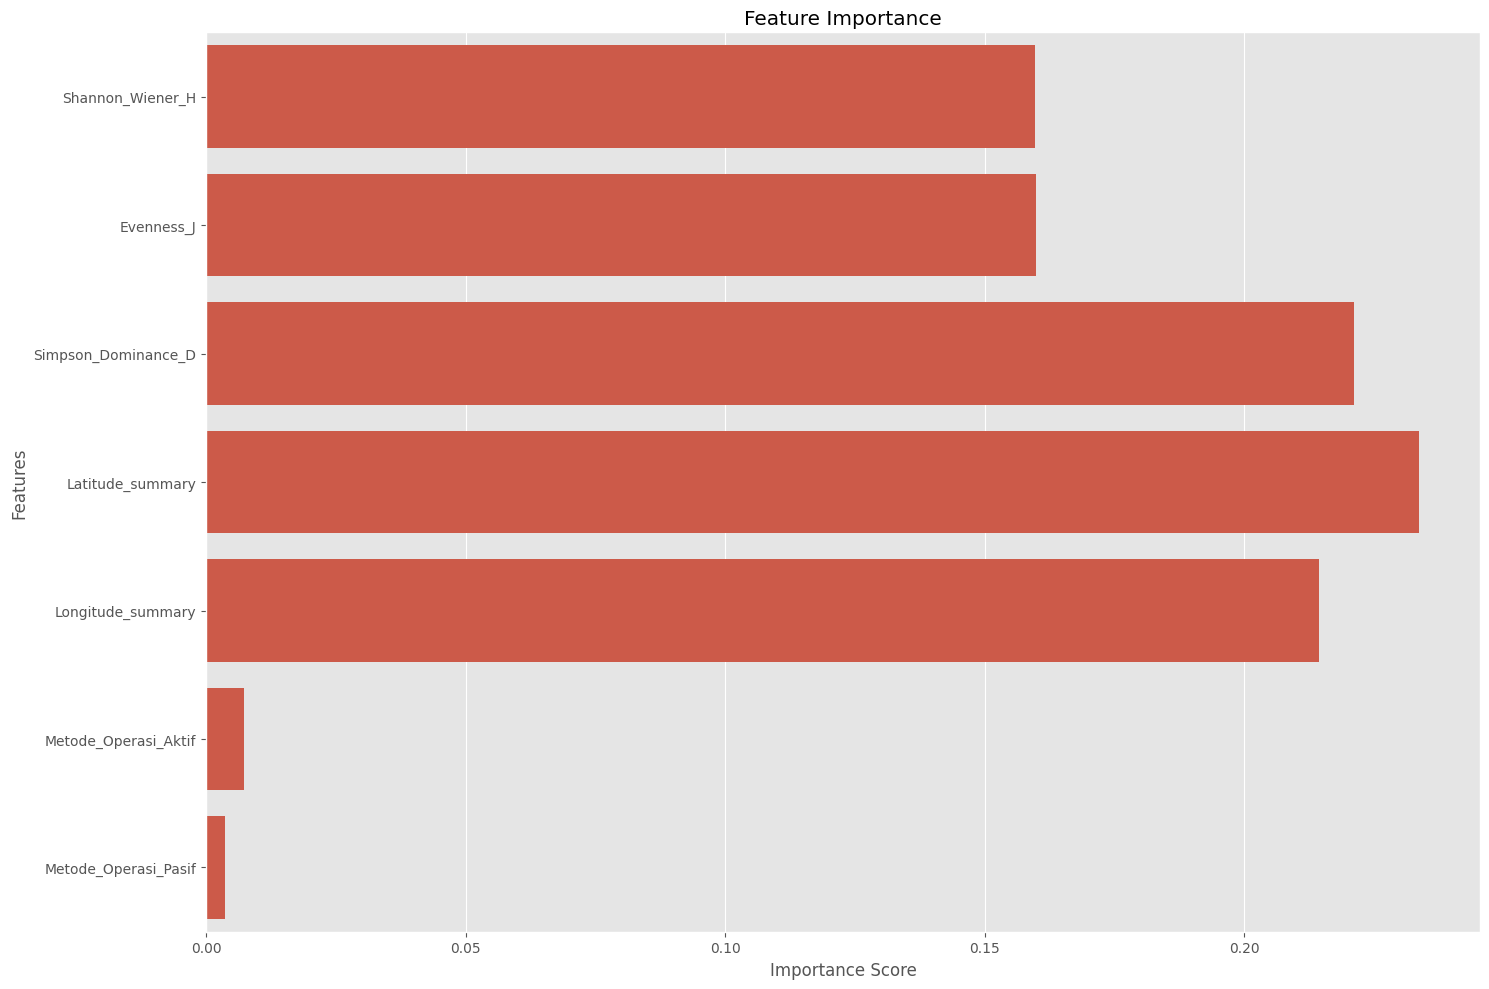

In [73]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train model
model = RandomForestClassifier()
model.fit(X_train_final, y_train)

# Ambil feature importance
importances = model.feature_importances_
features = X_train_final.columns

# Visualisasi
plt.figure(figsize=(15,10))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## Feature Selection

In [74]:
from sklearn.feature_selection import SelectFromModel

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_final, y_train)

# Pilih fitur berdasarkan ambang batas
# model yang sudah dilatih adalah 'model'
sfm = SelectFromModel(classifier, threshold=0.005, prefit=True)
X_train_selected = sfm.transform(X_train_final)
X_test_selected = sfm.transform(X_test_final)

# Dapatkan nama fitur yang dipilih
selected_feature_indices = sfm.get_support(indices=True)
selected_feature_names = X_train_final.columns[selected_feature_indices]

print(f"Jumlah fitur sebelum seleksi: {X_train_final.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {X_train_selected.shape[1]}")
print("Fitur yang dipilih:", list(selected_feature_names))

Jumlah fitur sebelum seleksi: 7
Jumlah fitur setelah seleksi: 6
Fitur yang dipilih: ['Shannon_Wiener_H', 'Evenness_J', 'Simpson_Dominance_D', 'Latitude_summary', 'Longitude_summary', 'Metode_Operasi_Pasif']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [75]:
# Konversi kembali menjadi DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train_final.index)

# Data test
X_test_selected_np = sfm.transform(X_test_final)
X_test_selected_df = pd.DataFrame(X_test_selected_np, columns=selected_feature_names, index=X_test_final.index)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [76]:
X_train_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 85 to 75
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Shannon_Wiener_H      55 non-null     float64
 1   Evenness_J            55 non-null     float64
 2   Simpson_Dominance_D   55 non-null     float64
 3   Latitude_summary      55 non-null     float64
 4   Longitude_summary     55 non-null     float64
 5   Metode_Operasi_Pasif  55 non-null     float64
dtypes: float64(6)
memory usage: 3.0 KB


In [77]:
X_test_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 67 to 18
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Shannon_Wiener_H      37 non-null     float64
 1   Evenness_J            37 non-null     float64
 2   Simpson_Dominance_D   37 non-null     float64
 3   Latitude_summary      37 non-null     float64
 4   Longitude_summary     37 non-null     float64
 5   Metode_Operasi_Pasif  37 non-null     float64
dtypes: float64(6)
memory usage: 2.0 KB


## Handle Class Imbalance

In [78]:
from imblearn import under_sampling, over_sampling

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train_selected_df, y_train)

# Oversampling
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train_selected_df, y_train)

# SMOTE
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train_selected_df, y_train)

print('Original')
print(pd.Series(y_train).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_train_SMOTE).value_counts())

Original
Status_Perairan_Label
0    32
1    12
2    11
Name: count, dtype: int64


UNDERSAMPLING
Status_Perairan_Label
0    11
1    11
2    11
Name: count, dtype: int64


OVERSAMPLING
Status_Perairan_Label
2    32
0    32
1    32
Name: count, dtype: int64


SMOTE
Status_Perairan_Label
2    32
0    32
1    32
Name: count, dtype: int64


# Modelling

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import pandas as pd

def eval_classification(model, X_train_eval, X_test_eval, y_train_eval, y_test_eval, model_name="Model"):
    print(f"\n--- Evaluasi Model: {model_name} ---")

    # --- DEBUGGING PRINTS ---
    print(f"Shape of X_test_eval received: {X_test_eval.shape}")
    print("Value counts for y_test_eval (actual labels):\n", y_test_eval.value_counts())
    # --- END DEBUGGING PRINTS ---

    y_pred = model.predict(X_test_eval)
    y_pred_train = model.predict(X_train_eval)
    y_pred_proba = model.predict_proba(X_test_eval)
    y_pred_proba_train = model.predict_proba(X_train_eval)

    # --- DEBUGGING PRINTS ---
    print("Value counts for y_pred (predicted labels):\n", pd.Series(y_pred).value_counts())
    print("Are y_test_eval and y_pred identical?", (y_test_eval == y_pred).all())
    # --- END DEBUGGING PRINTS ---

    print("\nAccuracy (Test Set): %.2f" % accuracy_score(y_test_eval, y_pred))
    print("Precision Weighted Avg (Test Set): %.2f" % precision_score(y_test_eval, y_pred, average='weighted', zero_division=0))
    print("Recall Weighted Avg (Test Set): %.2f" % recall_score(y_test_eval, y_pred, average='weighted', zero_division=0))
    print("F1-Score Weighted Avg (Test Set): %.2f" % f1_score(y_test_eval, y_pred, average='weighted', zero_division=0))

    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test_eval)
    y_train_binarized = lb.fit_transform(y_train_eval)

    roc_auc_test = roc_auc_score(y_test_binarized, y_pred_proba,
                                 average='weighted',
                                 multi_class='ovr')

    roc_auc_train = roc_auc_score(y_train_binarized, y_pred_proba_train,
                                  average='weighted',
                                  multi_class='ovr')

    print("roc_auc (test-proba, weighted, ovr): %.2f" % roc_auc_test)
    print("roc_auc (train-proba, weighted, ovr): %.2f" % roc_auc_train)

    print("\nClassification Report (Test Set):")
    print(classification_report(y_test_eval, y_pred, zero_division=0))

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train_SMOTE, y_train_SMOTE)

eval_classification(rf,
                    X_train_selected_df,  # Ini adalah X_train_eval
                    X_test_selected_df,   # Ini adalah X_test_eval
                    y_train,              # Ini adalah y_train_eval
                    y_test,               # Ini adalah y_test_eval
                    model_name="Random Forest")


--- Evaluasi Model: Random Forest ---
Shape of X_test_eval received: (37, 6)
Value counts for y_test_eval (actual labels):
 Status_Perairan_Label
0    21
1     8
2     8
Name: count, dtype: int64
Value counts for y_pred (predicted labels):
 0    21
1     8
2     8
Name: count, dtype: int64
Are y_test_eval and y_pred identical? True

Accuracy (Test Set): 1.00
Precision Weighted Avg (Test Set): 1.00
Recall Weighted Avg (Test Set): 1.00
F1-Score Weighted Avg (Test Set): 1.00
roc_auc (test-proba, weighted, ovr): 1.00
roc_auc (train-proba, weighted, ovr): 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [81]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Parameter grid untuk tuning (contoh)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# StratifiedKFold untuk menjaga proporsi kelas di setiap fold
# Penting, karena data kemungkinan tidak seimbang
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=kf, # Gunakan Cross-Validation
                           scoring='f1_weighted', # Atau metrik lain yang relevan seperti 'accuracy', 'precision_weighted', 'recall_weighted'
                           n_jobs=-1, # Gunakan semua core CPU
                           verbose=2)

# Tuning pada data SMOTE
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

print("\nBest Parameters found: ", grid_search.best_params_)
print("Best F1-Score (weighted) from CV: %.2f" % grid_search.best_score_)

# Model terbaik setelah tuning
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1-Score (weighted) from CV: 1.00


In [82]:
# Pastikan Anda mendapatkan best_rf_model setelah grid_search.fit()
best_rf_model = grid_search.best_estimator_

# Dapatkan nama fitur yang digunakan oleh model terbaik
# Ini adalah kolom dari X_train_selected_df
# Pastikan X_train_selected_df sesuai dengan input grid_search
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train_selected_df.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print("\nFeature Importances from Best RF Model (after CV):")
print(feature_importances_sorted)


Feature Importances from Best RF Model (after CV):
Latitude_summary        0.212566
Longitude_summary       0.211169
Simpson_Dominance_D     0.203019
Evenness_J              0.189055
Shannon_Wiener_H        0.184191
Metode_Operasi_Pasif    0.000000
dtype: float64


In [83]:
eval_classification(best_rf_model,
                    X_train_selected_df,
                    X_test_selected_df,
                    y_train,
                    y_test,
                    model_name="Random Forest (Tuned - Best from CV)")


--- Evaluasi Model: Random Forest (Tuned - Best from CV) ---
Shape of X_test_eval received: (37, 6)
Value counts for y_test_eval (actual labels):
 Status_Perairan_Label
0    21
1     8
2     8
Name: count, dtype: int64
Value counts for y_pred (predicted labels):
 0    21
1     8
2     8
Name: count, dtype: int64
Are y_test_eval and y_pred identical? True

Accuracy (Test Set): 1.00
Precision Weighted Avg (Test Set): 1.00
Recall Weighted Avg (Test Set): 1.00
F1-Score Weighted Avg (Test Set): 1.00
roc_auc (test-proba, weighted, ovr): 1.00
roc_auc (train-proba, weighted, ovr): 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_SMOTE, y_train_SMOTE)

eval_classification(lr,
                    X_train_selected_df,  # Ini adalah X_train_eval
                    X_test_selected_df,   # Ini adalah X_test_eval
                    y_train,              # Ini adalah y_train_eval
                    y_test,               # Ini adalah y_test_eval
                    model_name="Logistic Regression")


--- Evaluasi Model: Logistic Regression ---
Shape of X_test_eval received: (37, 6)
Value counts for y_test_eval (actual labels):
 Status_Perairan_Label
0    21
1     8
2     8
Name: count, dtype: int64
Value counts for y_pred (predicted labels):
 0    21
1     8
2     8
Name: count, dtype: int64
Are y_test_eval and y_pred identical? True

Accuracy (Test Set): 1.00
Precision Weighted Avg (Test Set): 1.00
Recall Weighted Avg (Test Set): 1.00
F1-Score Weighted Avg (Test Set): 1.00
roc_auc (test-proba, weighted, ovr): 1.00
roc_auc (train-proba, weighted, ovr): 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd
import numpy as np

# Inisialisasi Model Logistic Regression
# solver='liblinear' atau 'saga' cocok untuk dataset kecil dan multiclass
# max_iter ditingkatkan untuk memastikan konvergensi
# C adalah inverse of regularization strength (nilai lebih kecil = regularisasi lebih kuat)
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=200)

# Definisikan Parameter Grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Kekuatan regularisasi
    'penalty': ['l1', 'l2'],           # Jenis regularisasi
    'class_weight': [None, 'balanced'] # Menangani imbalance, meskipun sudah ada SMOTE
}

# Inisialisasi StratifiedKFold untuk Cross-Validation
# StratifiedKFold untuk menjaga proporsi kelas
kf_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_model,
                              param_grid=param_grid_lr,
                              cv=kf_lr,
                              scoring='f1_weighted', # 'f1_weighted' sebagai metrik utama
                              n_jobs=-1,             # Gunakan semua core CPU
                              verbose=2)

# Tuning (fit pada data SMOTE)
print("--- Memulai Grid Search untuk Logistic Regression ---")
grid_search_lr.fit(X_train_SMOTE, y_train_SMOTE)

# Tampilkan Hasil Terbaik
print("\nBest Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1-Score (weighted) from CV for LR: %.2f" % grid_search_lr.best_score_)

# Dapatkan Model LR Terbaik
best_lr_model = grid_search_lr.best_estimator_

--- Memulai Grid Search untuk Logistic Regression ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters for Logistic Regression: {'C': 1, 'class_weight': None, 'penalty': 'l1'}
Best F1-Score (weighted) from CV for LR: 1.00


In [86]:
import pandas as pd
import numpy as np

# Pastikan Anda telah menjalankan blok kode Grid Search untuk LR
# dan mendapatkan best_lr_model
best_lr_model = grid_search_lr.best_estimator_

# Dapatkan nama fitur
feature_names = X_train_selected_df.columns

# Ambil koefisien model
coefficients = best_lr_model.coef_

# Untuk klasifikasi multiclass, ada satu baris koefisien untuk setiap kelas.
# Kita bisa mengambil nilai absolutnya, lalu mengambil rata-rata untuk mendapatkan
# satu metrik "importansi" untuk setiap fitur.
if coefficients.ndim > 1:
    # Mengambil rata-rata nilai absolut koefisien di seluruh kelas
    feature_importances_lr = np.mean(np.abs(coefficients), axis=0)
else:
    # Jika hanya 1 dimensi (binary classification), ambil nilai absolut saja
    feature_importances_lr = np.abs(coefficients)

# Masukkan ke dalam Series untuk tampilan yang lebih rapi
importance_series = pd.Series(feature_importances_lr, index=feature_names)
importance_sorted = importance_series.sort_values(ascending=False)

print("\nImportansi Fitur dari Model LR (berdasarkan Koefisien):")
print(importance_sorted)


Importansi Fitur dari Model LR (berdasarkan Koefisien):
Latitude_summary        7.320723
Longitude_summary       4.911191
Evenness_J              0.000000
Shannon_Wiener_H        0.000000
Simpson_Dominance_D     0.000000
Metode_Operasi_Pasif    0.000000
dtype: float64


In [87]:
# Dapatkan koefisien model
coefficients = best_lr_model.coef_
class_labels = np.unique(y_train_SMOTE)

# Membuat DataFrame untuk visualisasi
coefficients_df = pd.DataFrame(coefficients, columns=feature_names, index=[f'Class {label}' for label in class_labels])

print("Koefisien Model Logistic Regression:")
print(coefficients_df)

Koefisien Model Logistic Regression:
         Shannon_Wiener_H  Evenness_J  Simpson_Dominance_D  Latitude_summary  \
Class 0               0.0         0.0                  0.0         -6.266339   
Class 1               0.0         0.0                  0.0         -7.764579   
Class 2               0.0         0.0                  0.0          7.931250   

         Longitude_summary  Metode_Operasi_Pasif  
Class 0           0.000000                   0.0  
Class 1         -11.921010                   0.0  
Class 2           2.812565                   0.0  


In [88]:
# Evaluasi Model LR Terbaik pada Test Set
eval_classification(best_lr_model,
                    X_train_selected_df,
                    X_test_selected_df,
                    y_train,
                    y_test,
                    model_name="Logistic Regression (Tuned - Best from CV)")


--- Evaluasi Model: Logistic Regression (Tuned - Best from CV) ---
Shape of X_test_eval received: (37, 6)
Value counts for y_test_eval (actual labels):
 Status_Perairan_Label
0    21
1     8
2     8
Name: count, dtype: int64
Value counts for y_pred (predicted labels):
 0    21
1     8
2     8
Name: count, dtype: int64
Are y_test_eval and y_pred identical? True

Accuracy (Test Set): 1.00
Precision Weighted Avg (Test Set): 1.00
Recall Weighted Avg (Test Set): 1.00
F1-Score Weighted Avg (Test Set): 1.00
roc_auc (test-proba, weighted, ovr): 1.00
roc_auc (train-proba, weighted, ovr): 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00    

## XGBoost

In [89]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xg.fit(X_train_SMOTE, y_train_SMOTE)

eval_classification(xg,
                    X_train_selected_df,  # Ini adalah X_train_eval
                    X_test_selected_df,   # Ini adalah X_test_eval
                    y_train,              # Ini adalah y_train_eval
                    y_test,               # Ini adalah y_test_eval
                    model_name="XGBoost")


--- Evaluasi Model: XGBoost ---
Shape of X_test_eval received: (37, 6)
Value counts for y_test_eval (actual labels):
 Status_Perairan_Label
0    21
1     8
2     8
Name: count, dtype: int64
Value counts for y_pred (predicted labels):
 0    21
1     8
2     8
Name: count, dtype: int64
Are y_test_eval and y_pred identical? True

Accuracy (Test Set): 1.00
Precision Weighted Avg (Test Set): 1.00
Recall Weighted Avg (Test Set): 1.00
F1-Score Weighted Avg (Test Set): 1.00
roc_auc (test-proba, weighted, ovr): 1.00
roc_auc (train-proba, weighted, ovr): 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:02:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [90]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd
import numpy as np

# Inisialisasi Model XGBoost
# objective='multi:softmax' untuk klasifikasi multiclass
# num_class disesuaikan dengan jumlah kelas di y (misal 3 jika kelas 0, 1, 2)
# eval_metric='mlogloss' cocok untuk multiclass
# use_label_encoder=False dan disable_default_eval_metric=True untuk menghindari warning di versi baru XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax',
                            num_class=len(np.unique(y_train_SMOTE)), # Jumlah kelas unik
                            random_state=42,
                            n_jobs=-1,
                            eval_metric='mlogloss')


# Definisikan Parameter Grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],         # Jumlah pohon
    'max_depth': [3, 5, 7],                 # Kedalaman maksimum pohon
    'learning_rate': [0.01, 0.1, 0.2],      # Ukuran langkah pengecilan kontribusi setiap pohon
    'subsample': [0.7, 0.8, 1.0],           # Rasio subsample dari data pelatihan
    'colsample_bytree': [0.7, 0.8, 1.0],    # Rasio subsample kolom saat membangun setiap pohon
    # 'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    # 'reg_alpha': [0, 0.1, 0.5],           # L1 regularization term on weights
    # 'reg_lambda': [1, 1.5, 2]             # L2 regularization term on weights
}

# Untuk eksplorasi awal, mulai dengan grid yang lebih kecil, lalu perbesar.
# Contoh grid yang lebih kecil untuk uji coba cepat:
param_grid_xgb = {
     'n_estimators': [50, 100],
     'max_depth': [3, 5],
     'learning_rate': [0.1],
 }


# Inisialisasi StratifiedKFold untuk Cross-Validation
kf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                               param_grid=param_grid_xgb,
                               cv=kf_xgb,
                               scoring='f1_weighted', # Gunakan F1-weighted sebagai metrik utama
                               n_jobs=-1,             # Gunakan semua core CPU
                               verbose=2)

# Tuning (fit pada data SMOTE)
print("\n--- Memulai Grid Search untuk XGBoost ---")
grid_search_xgb.fit(X_train_SMOTE, y_train_SMOTE)

# Tampilkan Hasil Terbaik
print("\nBest Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1-Score (weighted) from CV for XGBoost: %.2f" % grid_search_xgb.best_score_)

# Dapatkan Model XGBoost Terbaik
best_xgb_model = grid_search_xgb.best_estimator_


--- Memulai Grid Search untuk XGBoost ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best F1-Score (weighted) from CV for XGBoost: 1.00


In [91]:
# Dapatkan best_xgb_model setelah grid_search_xgb.fit()
best_xgb_model = grid_search_xgb.best_estimator_

# Dapatkan nama fitur yang digunakan oleh model terbaik
# Ini adalah kolom dari X_train_selected_df
# Pastikan X_train_selected_df sesuai dengan input grid_search
feature_importances = pd.Series(best_xgb_model.feature_importances_, index=X_train_selected_df.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print("\nFeature Importances from Best XGB Model (after CV):")
print(feature_importances_sorted)


Feature Importances from Best XGB Model (after CV):
Longitude_summary       0.5
Shannon_Wiener_H        0.5
Evenness_J              0.0
Simpson_Dominance_D     0.0
Latitude_summary        0.0
Metode_Operasi_Pasif    0.0
dtype: float32


In [92]:
# Evaluasi Model XGBoost Terbaik pada Test Set
eval_classification(best_xgb_model,
                    X_train_selected_df,
                    X_test_selected_df,
                    y_train,
                    y_test,
                    model_name="XGBoost (Tuned - Best from CV)")


--- Evaluasi Model: XGBoost (Tuned - Best from CV) ---
Shape of X_test_eval received: (37, 6)
Value counts for y_test_eval (actual labels):
 Status_Perairan_Label
0    21
1     8
2     8
Name: count, dtype: int64
Value counts for y_pred (predicted labels):
 0    21
1     8
2     8
Name: count, dtype: int64
Are y_test_eval and y_pred identical? True

Accuracy (Test Set): 1.00
Precision Weighted Avg (Test Set): 1.00
Recall Weighted Avg (Test Set): 1.00
F1-Score Weighted Avg (Test Set): 1.00
roc_auc (test-proba, weighted, ovr): 1.00
roc_auc (train-proba, weighted, ovr): 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



## SHAP

In [93]:
!pip install shap

### SHAP Random Forest

In [94]:
import shap

# Create a Tree explainer for the Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_selected_df)

In [95]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder dan simpan di variabel
label_encoder = LabelEncoder()

# Lakukan fit_transform pada kolom Status_Perairan
df_final['Status_Perairan_Label'] = label_encoder.fit_transform(df_final['Status_Perairan'])

# Sekarang, Anda bisa mengakses nama kelas aslinya
original_class_names = label_encoder.classes_

print("Urutan kelas dan nama aslinya:")
for i, class_name in enumerate(original_class_names):
    print(f"Kelas numerik {i} : {class_name}")

Urutan kelas dan nama aslinya:
Kelas numerik 0 : Cukup Sehat (Keanekaragaman Sedang, Kemerataan Baik, Tanpa Dominansi)
Kelas numerik 1 : Cukup Sehat (Keanekaragaman Sedang, Kemerataan Rendah, Tanpa Dominansi)
Kelas numerik 2 : Kurang Sehat


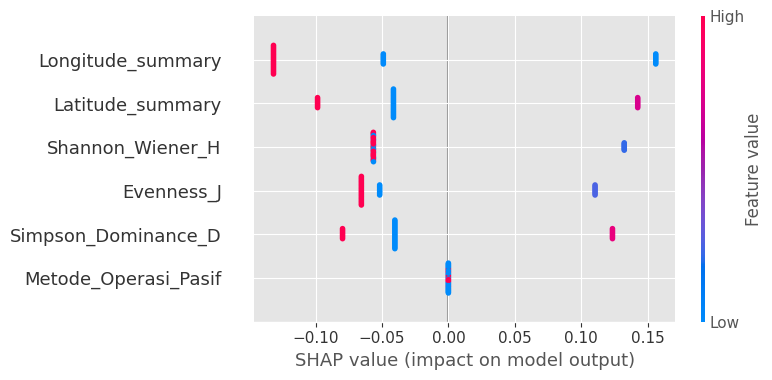

In [96]:
# Ambil shap value untuk kelas 1 (positif)
shap_values_class1 = shap_values[:, :, 1]

# Buat summary plot
shap.summary_plot(shap_values_class1, X_test_selected_df)

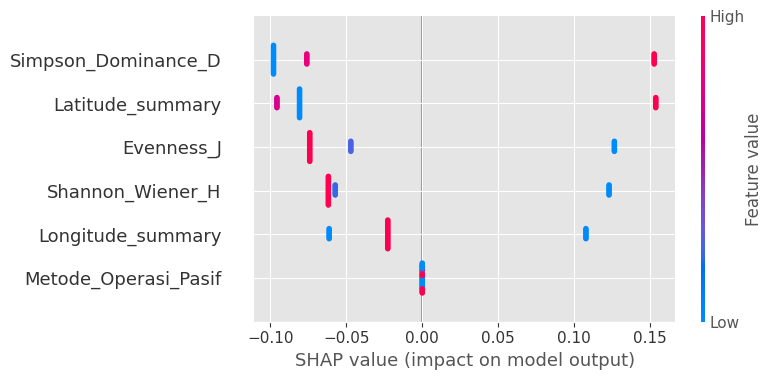

In [97]:
# Ambil shap value untuk kelas 2 (positif)
shap_values_class2 = shap_values[:, :, 2]

# Buat summary plot
shap.summary_plot(shap_values_class2, X_test_selected_df)

--- SHAP Summary Plot untuk Semua Kelas ---


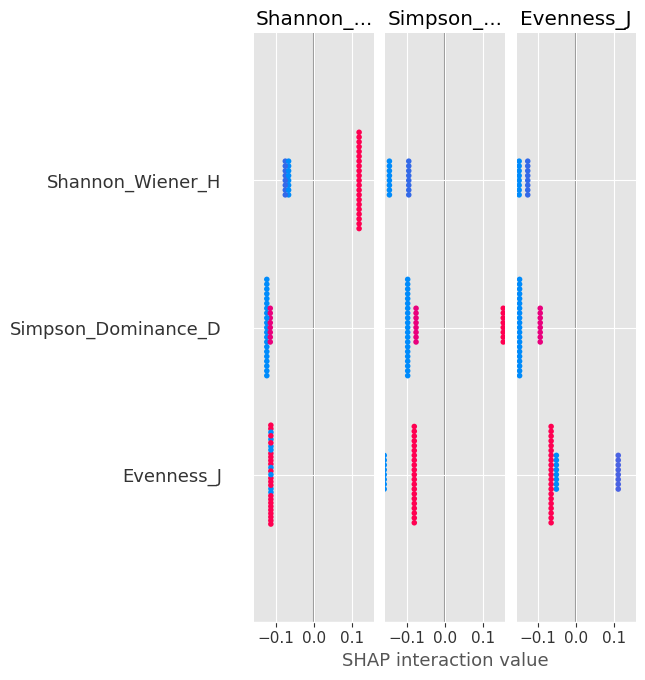

In [98]:
# Asumsikan Anda sudah memiliki variabel shap_values dan X_test_selected_df
# Serta variabel original_class_names dari kode LabelEncoder yang sudah Anda jalankan

# ---- Langkah 2: Buat Summary Plot untuk Semua Kelas ----
print("--- SHAP Summary Plot untuk Semua Kelas ---")

shap.summary_plot(shap_values, X_test_selected_df, class_names=original_class_names)

In [99]:
shap.initjs()

# SHAP values untuk sample ke-0 dan kelas 1
sample_index = 0
shap_values_sample = shap_values[sample_index, :, 1]

# Force plot
shap.force_plot(explainer.expected_value[1], shap_values_sample, X_test_selected_df.iloc[sample_index, :])

### SHAP XGBoost

In [100]:
# Dapatkan nama fitur dari model yang sudah dilatih
feature_names_model = X_train_selected_df.columns
print(feature_names_model)

Index(['Shannon_Wiener_H', 'Evenness_J', 'Simpson_Dominance_D',
       'Latitude_summary', 'Longitude_summary', 'Metode_Operasi_Pasif'],
      dtype='object')


In [101]:
# Pilih 3 fitur teratas dari seleksi fitur
selected_features = ['Shannon_Wiener_H', 'Evenness_J', 'Simpson_Dominance_D']

# Latih Ulang Model Terbaik (PENTING!)
# Dapatkan nama fitur yang benar dari data pelatihan yang sudah diseleksi
X_train_filtered = X_train_SMOTE[X_train_selected_df.columns]
y_train_filtered = y_train_SMOTE

best_xgb_model.fit(X_train_filtered, y_train_filtered)

# Dapatkan Nama Fitur Model dan Filter Data Test
# Ambil nama fitur yang digunakan saat pelatihan
feature_names_model = X_train_filtered.columns.tolist()

# Filter X_test_selected_df dengan nama fitur yang tepat
X_test_selected_df_filtered = X_test_selected_df[feature_names_model]

--- SHAP Summary Plot untuk Semua Kelas XGBoost ---


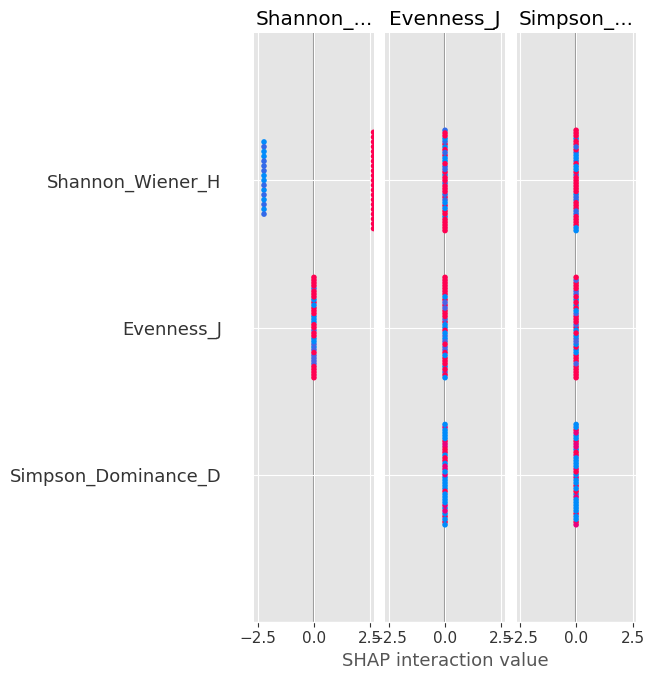

In [102]:
import shap

# Create a Tree explainer for the Random Forest model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values_multiclass = explainer.shap_values(X_test_selected_df_filtered)

print("--- SHAP Summary Plot untuk Semua Kelas XGBoost ---")
shap.summary_plot(shap_values_multiclass, X_test_selected_df_filtered, class_names=original_class_names)

In [103]:
# ---- KODE DEBUGGING TERAKHIR ----
print("\n--- DEBUGGING SHAP VALUES STRUCTURE ---")
print(f"Tipe shap_values_multiclass: {type(shap_values_multiclass)}")
if isinstance(shap_values_multiclass, list):
    print(f"Jumlah elemen dalam list: {len(shap_values_multiclass)}")
    print(f"Bentuk array pertama: {shap_values_multiclass[0].shape}")
else:
    print(f"Bentuk array: {shap_values_multiclass.shape}")

print("---------------------------------------")


--- DEBUGGING SHAP VALUES STRUCTURE ---
Tipe shap_values_multiclass: <class 'numpy.ndarray'>
Bentuk array: (37, 6, 3)
---------------------------------------



--- Force Plot untuk Sampel ke-0 dan Kelas 'Kurang Sehat' ---


/usr/local/lib/python3.11/dist-packages/shap/plots/_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


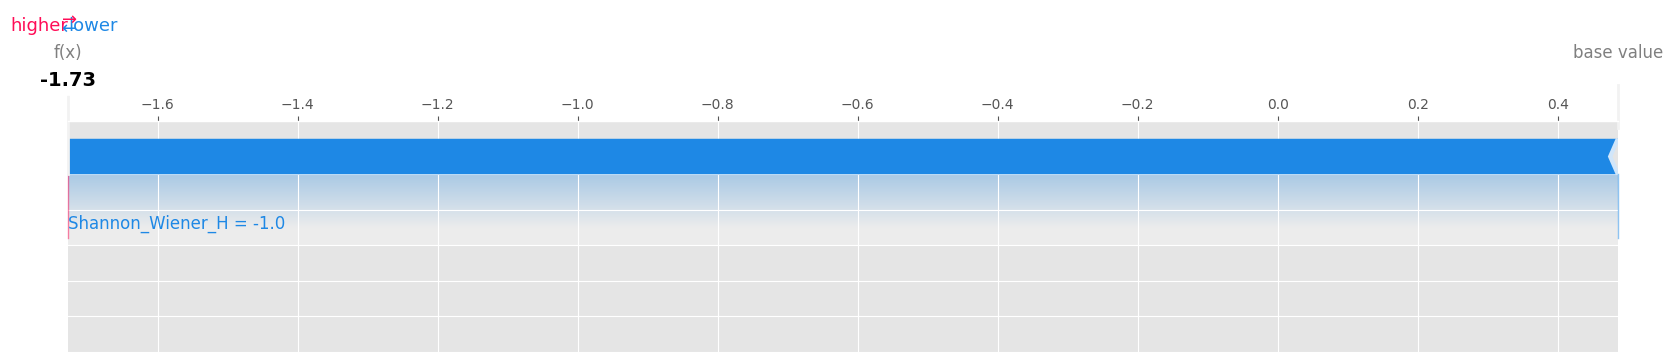

In [104]:
shap.initjs()

# Tentukan sampel dan kelas yang ingin dianalisis
sample_index = 0
class_to_explain = 2 # Kelas 'Kurang Sehat'

print(f"\n--- Force Plot untuk Sampel ke-{sample_index} dan Kelas '{original_class_names[class_to_explain]}' ---")

# Ambil SHAP values yang tepat untuk sampel dan kelas tersebut dari array 3D
# Urutan slicing yang benar adalah [sampel, fitur, kelas]
shap_values_sample_class = shap_values_multiclass[sample_index, :, class_to_explain]

# Buat force plot
shap.force_plot(explainer.expected_value[class_to_explain],
                shap_values_sample_class,
                X_test_selected_df_filtered.iloc[[sample_index]],
                matplotlib=True)


--- Force Plot untuk Sampel ke-0 dan Kelas 'Cukup Sehat (Keanekaragaman Sedang, Kemerataan Rendah, Tanpa Dominansi)' ---


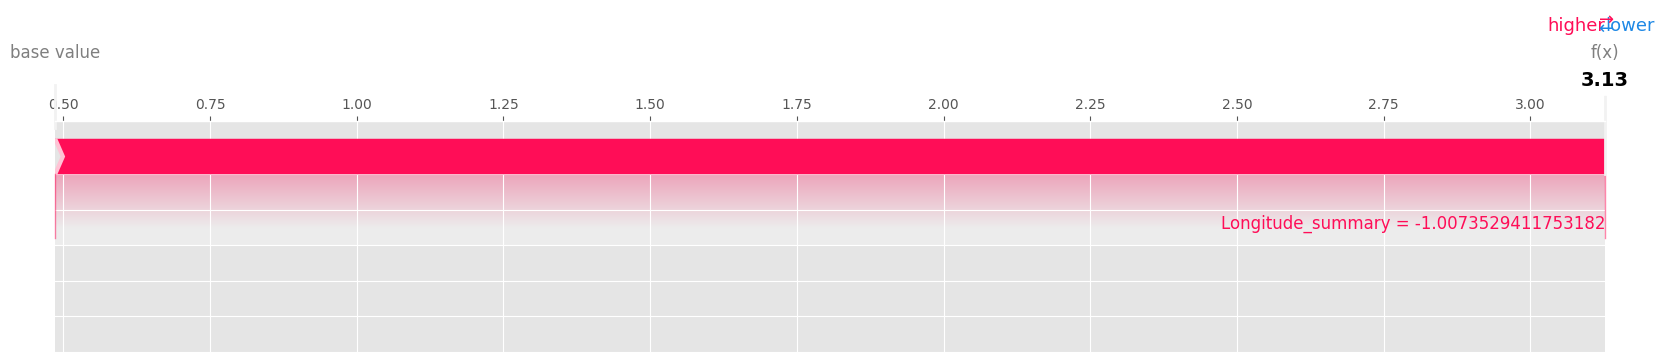

In [105]:
shap.initjs()

# Tentukan sampel dan kelas yang ingin dianalisis
sample_index = 0
class_to_explain = 1 # Kelas 'Kurang Sehat'

print(f"\n--- Force Plot untuk Sampel ke-{sample_index} dan Kelas '{original_class_names[class_to_explain]}' ---")

# Ambil SHAP values yang tepat untuk sampel dan kelas tersebut dari array 3D
# Urutan slicing yang benar adalah [sampel, fitur, kelas]
shap_values_sample_class = shap_values_multiclass[sample_index, :, class_to_explain]

# Buat force plot
shap.force_plot(explainer.expected_value[class_to_explain],
                shap_values_sample_class,
                X_test_selected_df_filtered.iloc[[sample_index]],
                matplotlib=True)


--- Force Plot untuk Sampel ke-10 dan Kelas 'Kurang Sehat' ---


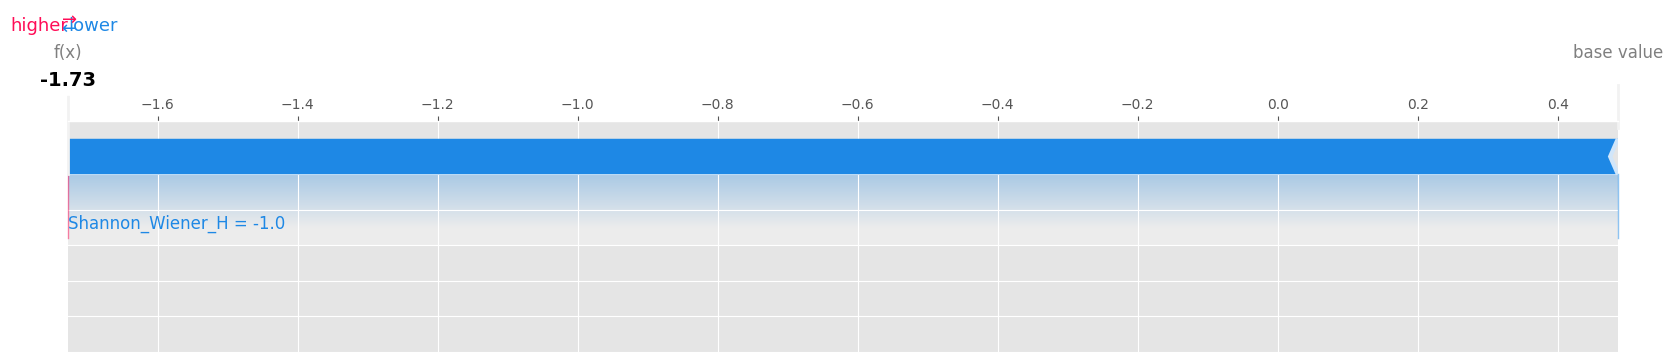

In [106]:
shap.initjs()

# Tentukan sampel dan kelas yang ingin dianalisis
sample_index = 10
class_to_explain = 2 # Kelas 'Kurang Sehat'

print(f"\n--- Force Plot untuk Sampel ke-{sample_index} dan Kelas '{original_class_names[class_to_explain]}' ---")

# Ambil SHAP values yang tepat untuk sampel dan kelas tersebut dari array 3D
# Urutan slicing yang benar adalah [sampel, fitur, kelas]
shap_values_sample_class = shap_values_multiclass[sample_index, :, class_to_explain]

# Buat force plot
shap.force_plot(explainer.expected_value[class_to_explain],
                shap_values_sample_class,
                X_test_selected_df_filtered.iloc[[sample_index]],
                matplotlib=True)

## Validation Curve

In [107]:
import numpy as np

# --- KODE DEBUGGING TERAKHIR UNTUK MEMERIKSA DATA ---
print("--- MEMERIKSA DATA SEBELUM VALIDATION CURVE ---")
print(f"Bentuk X_train_final: {X_train_final.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Jumlah kelas unik di y_train: {np.unique(y_train)}")
print(f"Jenis data X_train_final:\n{X_train_final.info()}")
print("---------------------------------------------")

# Setelah ini, jalankan kode validation_curve seperti biasa
# ...

--- MEMERIKSA DATA SEBELUM VALIDATION CURVE ---
Bentuk X_train_final: (55, 7)
Bentuk y_train: (55,)
Jumlah kelas unik di y_train: [0 1 2]
<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 85 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Shannon_Wiener_H      55 non-null     float64
 1   Evenness_J            55 non-null     float64
 2   Simpson_Dominance_D   55 non-null     float64
 3   Latitude_summary      55 non-null     float64
 4   Longitude_summary     55 non-null     float64
 5   Metode_Operasi_Aktif  55 non-null     float64
 6   Metode_Operasi_Pasif  55 non-null     float64
dtypes: float64(7)
memory usage: 3.4 KB
Jenis data X_train_final:
None
---------------------------------------------


### VC Random Forest

Menggunakan param_range: [10, 50, 100, 200, 300]
Bentuk train_scores: (5, 5)
Bentuk test_scores: (5, 5)


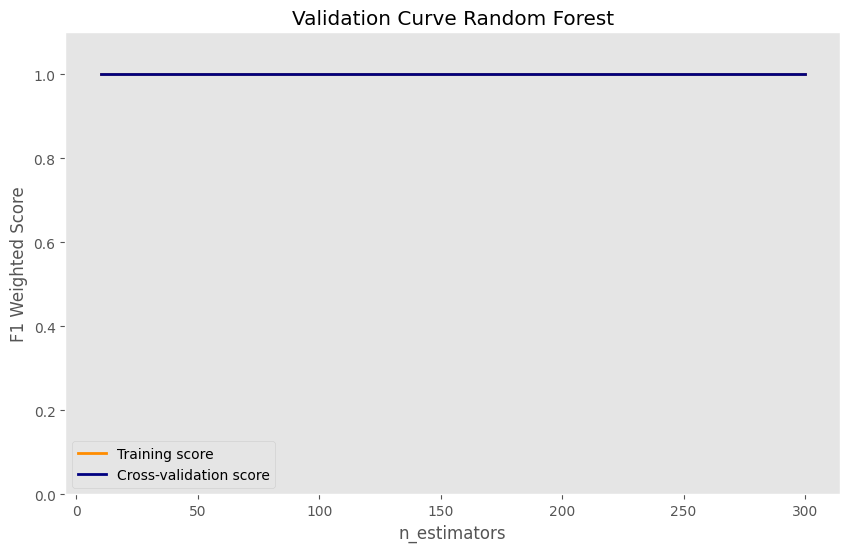

In [108]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 1. Definisikan model RandomForest
model_rf = RandomForestClassifier(random_state=42)

# 2. Tentukan hyperparameter yang akan diuji dan rentang nilainya
# Pastikan ini adalah angka integer positif
param_name = "n_estimators"
param_range = [10, 50, 100, 200, 300]

print(f"Menggunakan param_range: {param_range}")

# 3. Gunakan validation_curve dengan scoring yang sesuai untuk multiclass
train_scores, test_scores = validation_curve(
    model_rf,
    X_train_final,
    y_train,
    param_name=param_name,
    param_range=param_range,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

# 4. Debugging: Periksa shape dari array skor
print(f"Bentuk train_scores: {train_scores.shape}")
print(f"Bentuk test_scores: {test_scores.shape}")

# 5. Hitung nilai rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 6. Plotting
plt.figure(figsize=(10, 6))
plt.title("Validation Curve Random Forest")
plt.xlabel(param_name)
plt.ylabel("F1 Weighted Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()

### VC Logistic Regression

Bentuk train_scores: (7, 5)
Bentuk test_scores: (7, 5)


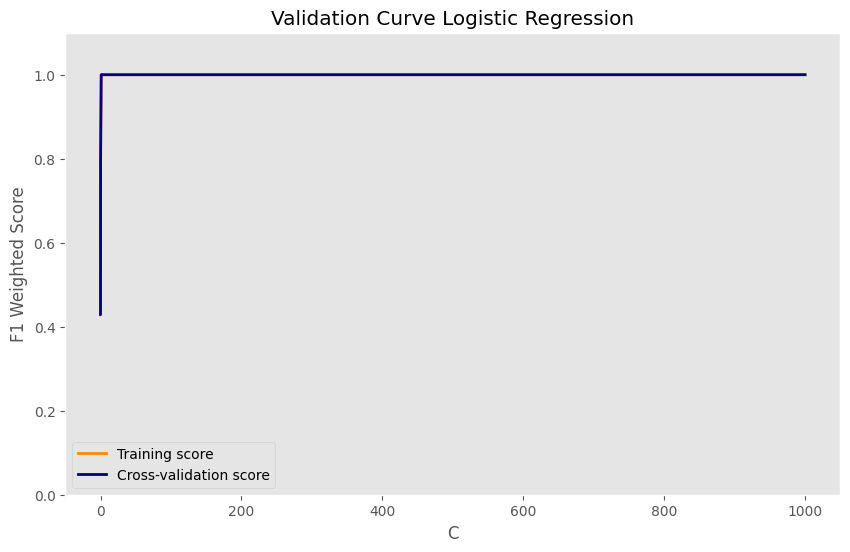

In [109]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

# Definisikan model dan hyperparameter yang akan diuji
model = LogisticRegression(penalty='l2')
param_name = "C"
param_range = np.logspace(-3, 3, 7) # Contoh range nilai C

# Gunakan validation_curve dengan scoring yang sesuai untuk multiclass
train_scores, test_scores = validation_curve(
    model,
    X_train_final,
    y_train,
    param_name=param_name,
    param_range=param_range,
    scoring='f1_weighted', # Menggunakan F1 untuk multiclass
    cv=5,
    n_jobs=-1
)

# 4. Debugging: Periksa shape dari array skor
print(f"Bentuk train_scores: {train_scores.shape}")
print(f"Bentuk test_scores: {test_scores.shape}")

# 5. Hitung nilai rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 6. Plotting
plt.figure(figsize=(10, 6))
plt.title("Validation Curve Logistic Regression")
plt.xlabel(param_name)
plt.ylabel("F1 Weighted Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()

### VC XGBoost

Bentuk train_scores: (5, 5)
Bentuk test_scores: (5, 5)


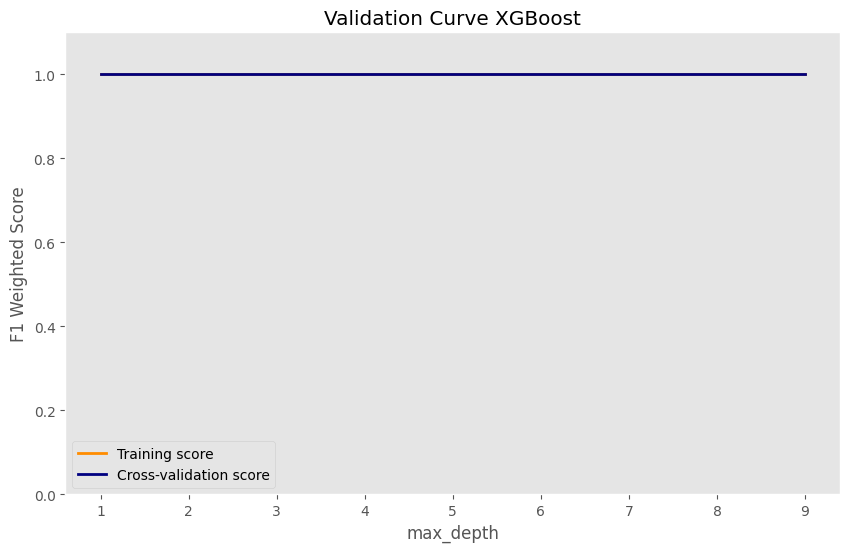

In [110]:
import numpy as np
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.model_selection import validation_curve

# Definisikan model XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Tentukan hyperparameter yang akan diuji dan rentang nilainya
param_name = "max_depth"
param_range = [1, 3, 5, 7, 9]

# Gunakan validation_curve
train_scores, test_scores = validation_curve(
    model_xgb,
    X_train_final,
    y_train,
    param_name=param_name,
    param_range=param_range,
    scoring='f1_weighted', # Menggunakan metrik yang sesuai
    cv=5,
    n_jobs=-1
)

# 4. Debugging: Periksa shape dari array skor
print(f"Bentuk train_scores: {train_scores.shape}")
print(f"Bentuk test_scores: {test_scores.shape}")

# 5. Hitung nilai rata-rata dan standar deviasi
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 6. Plotting
plt.figure(figsize=(10, 6))
plt.title("Validation Curve XGBoost")
plt.xlabel(param_name)
plt.ylabel("F1 Weighted Score")
plt.ylim(0.0, 1.1)
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()

## Confusion Matrix

### CM Random Forest

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 1. Definisikan model
model_rf = RandomForestClassifier(random_state=42)

# LATIH MODEL ANDA DENGAN DATA PELATIHAN
model_rf.fit(X_train_final, y_train)
print("Model RandomForest telah dilatih.")

# 2. Buat prediksi pada data uji
y_true = y_test
y_pred = model_rf.predict(X_test_final)

# 3. Hitung Confusion Matrix
cm_rf = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)

Model RandomForest telah dilatih.

Confusion Matrix Random Forest:
[[21  0  0]
 [ 0  8  0]
 [ 0  0  8]]


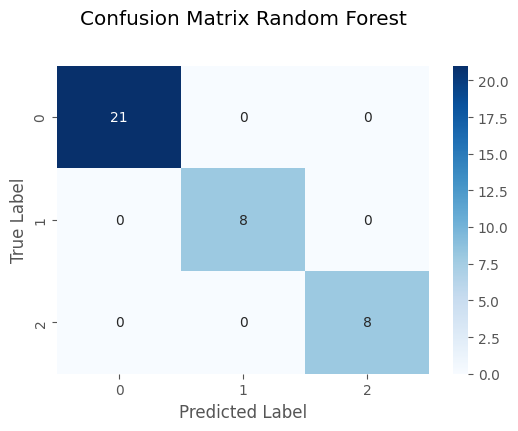

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm_rf = confusion_matrix(y_true, y_pred)

# Visualisasikan
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix Random Forest', pad=30)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### CM Logistic Regression

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 1. Definisikan model
model_lr = LogisticRegression(random_state=42)

# LATIH MODEL ANDA DENGAN DATA PELATIHAN
model_lr.fit(X_train_final, y_train)
print("Model LogisticRegression telah dilatih.")

# 2. Buat prediksi pada data uji
y_true = y_test
y_pred = model_lr.predict(X_test_final)

# 3. Hitung Confusion Matrix
cm_lr = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix Logistic Regression:")
print(cm_lr)

Model LogisticRegression telah dilatih.

Confusion Matrix Logistic Regression:
[[21  0  0]
 [ 0  8  0]
 [ 0  0  8]]


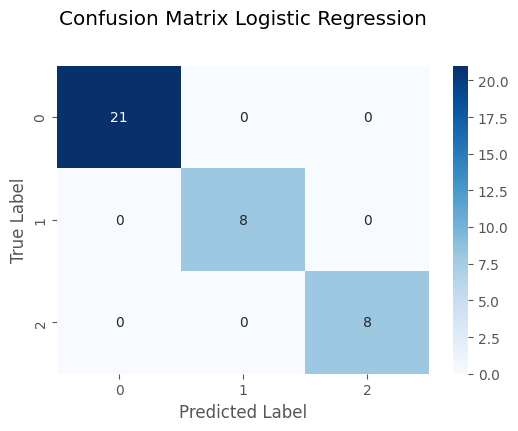

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm_lr = confusion_matrix(y_true, y_pred)

# Visualisasikan
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix Logistic Regression', pad=30)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### CM XGBoost

In [117]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import pandas as pd

# 1. Definisikan model
model_xgb = XGBClassifier(random_state=42)

# LATIH MODEL ANDA DENGAN DATA PELATIHAN
model_xgb.fit(X_train_final, y_train)
print("Model XGBoost telah dilatih.")

# 2. Buat prediksi pada data uji
y_true = y_test
y_pred = model_xgb.predict(X_test_final)

# 3. Hitung Confusion Matrix
cm_xgb = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix XGBoost:")
print(cm_xgb)

Model XGBoost telah dilatih.

Confusion Matrix XGBoost:
[[21  0  0]
 [ 0  8  0]
 [ 0  0  8]]


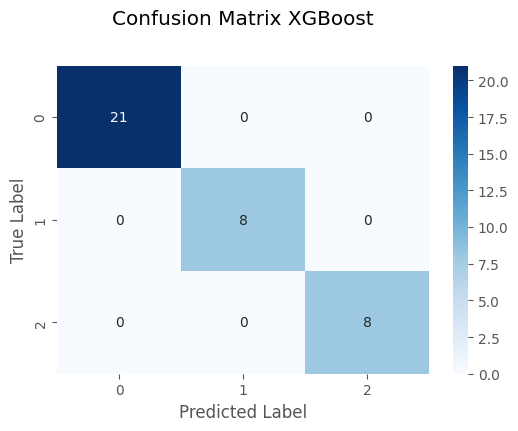

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm_xgb = confusion_matrix(y_true, y_pred)

# Visualisasikan
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix XGBoost', pad=30)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()